<a id='top'></a>

# Deliveroo “Rider Get Rider” Case Study
### By Edd Webster
Notebook first submitted: 14/12/2019<br>
Notebook revised: 22/01/2020 (see newly added [Section 8](#section8) with additional findings since the first submission)

![title](images/deliveroologo3.png)

Click [here](#section5) to jump straight to the Exploratory Data Analysis section where the questions are the brief are asked, skipping the [Task Brief](#section2), [Data Sources](#section3), and [Data Engineering](#section4) sections. Or click [here](#section6) to jump straight to the Conclusion. For this second submission, a newly added [Section 8](#section8) with additional findings since the first submission can be found.

## Introduction
This notebook is an Exploratory Data Analysis (EDA) of Rider data for [Deliveroo](https://deliveroo.co.uk/), analysing the performance of the 'Rider Get Rider' (RGR) scheme, an incentivised referral scheme targeting current Deliveroo Riders, determining whether or not it is successful. The dataset provided is explored and the findings summarised using [pandas](http://pandas.pydata.org/) DataFrames and [Seaborn](https://seaborn.pydata.org/) visualisations.

For more information about this notebook and the author, I'm available through all the following channels:
*    [EddWebster.com](https://www.eddwebster.com/),
*    edd.j.webster@gmail.com,
*    [LinkedIn.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/), and
*    [GitHub/eddwebster](https://github.com/eddwebster/).

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/deliveroo) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/deliveroo/blob/master/RGR%20Case%20Study%20-%2022012020.ipynb).

## Notebook Contents
1.    [Notebook Dependencies](#section1)<br>
2.    [Task Brief](#section2)<br>
      2.1.  [Background](#section2.1)<br>
      2.2.  [The Task](#section2.2)<br>
3.    [Data Source](#section3)<br>
      3.1.  [Introduction](#section3.1)<br>
      3.2.  [Data Dictionary](#section3.2)<br>
      3.3.  [Data Import](#section3.3)<br>
      3.4.  [Initial Data Handling](#section3.4)<br>
      3.5.  [Export the Raw DataFrame](#section3.5)<br>
4.    [Data Engineering](#section4)<br>
      4.1.  [Introduction](#section4.1)<br>
      4.2.  [Data Wrangling](#section4.1)<br>
      4.3.  [Exporting the Engineered DataFrame](#section4.1)<br>
5.    [Exploratory Data Analysis (EDA)](#section5)<br>
      5.1.  [Definition of a Successful RGR scheme](#section5.1)<br>
      5.2.  [How has the RGR Scheme's Performance Compare with other Channels?](#section5.2)<br>
      5.3.  [How does Rider Performance / Behaviour vary between the Channels?](#section5.3)<br>
6.    [Summary and Conclusion](#section6)<br>
7.    [Next Steps](#section7)<br>
8.    [Revision of First Submission](#section8)<br>
      8.1.  [Location](#section8.1)<br>
      8.2.  [Vehicle Types](#section8.2)<br>
      8.3.  [Next Steps...Revisited](#section8.3)<br>
9.    [Bibliography](#section9)<br>
      9.1.  [Bibliography](#section9.1)<br>
      9.2.  [Python Techniques Observed](#section9.2)<br>

<a id='section1'></a>

## 1. Notebook Setup

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [Jupyter notebooks](https://jupyter.org/) for this interactive computational environment that the project is presented,
*    [NumPy](http://www.numpy.org/) for multidimensional array computing,
*    [pandas](http://pandas.pydata.org/) for data manipulation and ingestion, and
*    [Seaborn](https://seaborn.pydata.org/) for data visualisation.

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

In [1]:
# Import modules

# Python ≥3.5 (ideally)
import sys
assert sys.version_info >= (3, 5)

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np

# Data Preprocessing
import pandas as pd
import os

# Plotting figures
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno    # not include with Conda, 'pip install missingno' in the terminal if you don't have it

# Display in Jupyter
from IPython.display import Image
from IPython.core.display import HTML

# Ignore warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print("Setup Complete")

Setup Complete


<a id='section2'></a>

## 2. Task Brief
The following brief has been copied and pasted from the Word document provided and is included in this Jupyter notebook for reference. Click [here](#section3) to skip to the next section where the proper coding begins.

<a id='section2.1'></a>

### 2.1. Background
>At [Deliveroo](https://deliveroo.co.uk/), we want to understand our customers, rider and restaurants in as much detail as possible. As we attempt to build and maintain the optimal rider fleet we utilise a series of marketing channels and schemes to attract new Riders. One of these channels is referred to as ‘Rider Get Rider’ or ‘RGR’, which is an incentivised referral scheme targeting current Deliveroo Riders.

<a id='section2.2'></a>

### 2.2. The Task
>Imagine a senior manager has asked you to analyse the performance of the RGR scheme and determine if it is successful. They have asked you to take them through your findings later that day. Analyse the dataset provided and summarise your findings.
>
>**The overarching question you should answer with your analysis is:
>“Is the RGR scheme successful, and why have you reached that conclusion?”**
>*    You should define what success is
>*    How has RGR performed compared with other channels?
>*    How does rider performance / behaviour vary between the channels?
>
>Summarise your findings
>*    Your summary could be a short document, one tab of a spreadsheet or a notebook
>*    Please do not spend time creating a presentation / slide deck
>*    It should be logically set out so the reader can follow your main findings and any conclusions you have arrived at
>*    It should make appropriate use of visualisations to convey your findings
>
>*Note - We have provided a clean data set and you do not need to do any data cleaning.*

<a id='section3'></a>

## 3. Data Source

<a id='section3.1'></a>

### 3.1.  Overview
The fictional sample of weekly data for each rider for their first 24 weeks with Deliveroo. The dataset is one row per rider per week - each rider has 25 rows of data (includes week 0 which is the week they joined).

The first task is to import this `csv` file as a [pandas](http://pandas.pydata.org/) DataFrame, from which we can conduct our Exploratory Data Analysis (EDA) in [Section 5](#section5).

<a id='section3.2'></a>

### 3.2. Data Dictionary
The dataset has nineteen features (columns) with the following definitions and data types:

| Variable     | Data type    | Definition     |
|------|-----|-----|
| `RIDER_ID`    | int64     | a unique rider identifier     |
| `LOCATION`    | objects     | the city the rider applied in     |
| `APPLICATION_DATE`    | object     | the date the rider applied to work for Deliveroo     |
| `APPLICATION_APPROVED_DATE`    | object     | the date that the rider application was approved     |
| `FIRST_WORK_DATE`    | object     | the date of the rider’s first shift     |
| `ACQUISITION_CHANNEL`    | object     | the last touch marketing channel recorded for the rider/applicant     |
| `VEHICLE_TYPE`    | object     | the type of vehicle the rider uses     |
| `WEEKS_SINCE_FIRST_WORK`    | object     | the number of weeks since the first_work_date, from 0-24     |
| `RIDER_ACTIVE`    | bool     | Boolean flag if the rider worked in that week or not     |
|`HOURS_WORKED`    | float64     | the number of hours worked by the rider that week     |
| `HOURS_WORKED_CUMULATIVE`    | float64     | the cumulative number of hours worked by the rider to date     |
| `ORDERS_DELIVERED`    | float64     | the number of orders delivered by the rider that week     |
| `ORDERS_DELIVERED_CUMULATIVE`    | float64     | the cumulative number of orders delivered by the rider to date     |
| `THROUGHPUT`    | float64     | the orders per hour (orders / hours) of the rider that week     |
| `THROUGHPUT_CUMULATIVE_REFERRALS`    | float64     | the cumulative throughput of the rider to date     |
| `REFERRALS`    | float64     | the number of referrals made by that rider that week     |
| `REFERRALS_CUMULATIVE`    | float64     | the cumulative number of referrals made by that rider to date     |
| `SUCCESSFUL_REFERRALS`    | float64     | the number of successful (approved) referrals made by the rider in that week     |
| `SUCCESSFUL_REFERRAKS_CUMULATIVE`    | float64     | the cumulative number of successful (approved) referrals made by the rider to date     |

The data will be features will be cut-down and organsied to suit our needs in the [Data Engineering](#section4) section (Section 4).

<a id='section3.3'></a>

### 3.3. Data Import
First, let's import the `csv` file provided, `rgr_take_home_v3_dataset.csv`, to this Jupyter notebook as a pandas DataFrame.

The code for creating our DataFrame, `df_raw`, is as follows:

In [2]:
# Import CSV to notebook as a pandas DataFrame
filepath = "data/rgr_take_home_v3_dataset.csv"
df_raw = pd.read_csv(filepath)

<a id='section3.4'></a>

### 3.4. Initial Data Handling
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [3]:
# Display the first 5 rows of the raw DataFrame, df_raw
df_raw.head()

,RIDER_ID,LOCATION,APPLICATION_DATE,APPLICATION_APPROVED_DATE,FIRST_WORK_DATE,ACQUISITION_CHANNEL,VEHICLE_TYPE,WEEKS_SINCE_FIRST_WORK,RIDER_ACTIVE,HOURS_WORKED,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT,THROUGHPUT_CUMULATIVE,REFERRALS,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS,SUCCESSFUL_REFERRALS_CUMULATIVE
0,1864,Roo York,05/03/2017,31/03/2017,03/04/2017,Digital,Scooter / Motorcycle,0,True,18.918334,18.918334,44.0,44.0,2.325786,2.325786,NaN,NaN,NaN,NaN
1,1864,Roo York,05/03/2017,31/03/2017,03/04/2017,Digital,Scooter / Motorcycle,1,True,33.625274,52.543608,78.0,122.0,2.319684,2.321881,NaN,NaN,NaN,NaN
2,1864,Roo York,05/03/2017,31/03/2017,03/04/2017,Digital,Scooter / Motorcycle,2,True,10.539444,63.083052,30.0,152.0,2.846450,2.409522,NaN,NaN,NaN,NaN
3,1864,Roo York,05/03/2017,31/03/2017,03/04/2017,Digital,Scooter / Motorcycle,3,True,10.268887,73.351939,38.0,190.0,3.700498,2.590252,NaN,NaN,NaN,NaN
4,1864,Roo York,05/03/2017,31/03/2017,03/04/2017,Digital,Scooter / Motorcycle,4,True,17.463331,90.815270,58.0,248.0,3.321245,2.730818,NaN,NaN,NaN,NaN


In [4]:
# Display the last 5 rows of the raw DataFrame, df_raw
df_raw.tail()

,RIDER_ID,LOCATION,APPLICATION_DATE,APPLICATION_APPROVED_DATE,FIRST_WORK_DATE,ACQUISITION_CHANNEL,VEHICLE_TYPE,WEEKS_SINCE_FIRST_WORK,RIDER_ACTIVE,HOURS_WORKED,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT,THROUGHPUT_CUMULATIVE,REFERRALS,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS,SUCCESSFUL_REFERRALS_CUMULATIVE
113520,103776,Roo York,28/03/2017,07/04/2017,08/04/2017,Referral,Scooter / Motorcycle,20,False,NaN,283.251111,NaN,638.0,NaN,2.252418,NaN,NaN,NaN,NaN
113521,103776,Roo York,28/03/2017,07/04/2017,08/04/2017,Referral,Scooter / Motorcycle,21,True,2.080833,285.331944,4.0,642.0,1.922307,2.250011,NaN,NaN,NaN,NaN
113522,103776,Roo York,28/03/2017,07/04/2017,08/04/2017,Referral,Scooter / Motorcycle,22,True,0.664722,285.996666,2.0,644.0,3.008777,2.251775,NaN,NaN,NaN,NaN
113523,103776,Roo York,28/03/2017,07/04/2017,08/04/2017,Referral,Scooter / Motorcycle,23,False,0.000000,285.996666,NaN,644.0,NaN,2.251775,NaN,NaN,NaN,NaN
113524,103776,Roo York,28/03/2017,07/04/2017,08/04/2017,Referral,Scooter / Motorcycle,24,False,NaN,285.996666,NaN,644.0,NaN,2.251775,NaN,NaN,NaN,NaN


[shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) returns a tuple representing the dimensionality of the DataFrame.

In [5]:
# Print the shape of the raw DataFrame, df_raw
print(df_raw.shape)

(113525, 19)


The raw DataFrame has:
*    113,525 observations (rows), each observation represents one Rider per week, and
*    19 attributes (columns).

[columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html) returns the column labels of the DataFrame.

In [6]:
# Features (column names) of the raw DataFrame, df_raw
df_raw.columns

Index(['RIDER_ID', 'LOCATION', 'APPLICATION_DATE', 'APPLICATION_APPROVED_DATE',
       'FIRST_WORK_DATE', 'ACQUISITION_CHANNEL', 'VEHICLE_TYPE',
       'WEEKS_SINCE_FIRST_WORK', 'RIDER_ACTIVE', 'HOURS_WORKED',
       'HOURS_WORKED_CUMULATIVE', 'ORDERS_DELIVERED',
       'ORDERS_DELIVERED_CUMULATIVE', 'THROUGHPUT', 'THROUGHPUT_CUMULATIVE',
       'REFERRALS', 'REFERRALS_CUMULATIVE', 'SUCCESSFUL_REFERRALS',
       'SUCCESSFUL_REFERRALS_CUMULATIVE'],
      dtype='object')

The dataset has nineteen features (columns):
*    `RIDER_ID`: a unique rider identifier
*    `LOCATION`: the city the rider applied in
*    `APPLICATION_DATE`: the date the rider applied to work for Deliveroo
*    `APPLICATION_APPROVED_DATE`: the date that the rider application was approved
*    `FIRST_WORK_DATE`: 
*    `ACQUISITION_CHANNEL`: the last touch marketing channel recorded for the rider/applicant
*    `VEHICLE_TYPE`: the type of vehicle the rider uses
*    `WEEKS_SINCE_FIRST_WORK`: the number of weeks since the first_work_date, from 0-24
*    `RIDER_ACTIVE`: Boolean flag if the rider worked in that week or not
*    `HOURS_WORKED`: the number of hours worked by the rider that week
*    `HOURS_WORKED_CUMULATIVE`: the cumulative number of hours worked by the rider to date
*    `ORDERS_DELIVERED`: the number of orders delivered by the rider that week
*    `ORDERS_DELIVERED_CUMULATIVE`: the cumulative number of orders delivered by the rider to date
*    `THROUGHPUT`: the orders per hour (orders / hours) of the rider that week
*    `THROUGHPUT_CUMULATIVE_REFERRALS`: the cumulative throughput of the rider to date
*    `REFERRALS`: the number of referrals made by that rider that week
*    `REFERRALS_CUMULATIVE`: the cumulative number of referrals made by that rider to date
*    `SUCCESSFUL_REFERRALS`: the number of successful (approved) referrals made by the rider in that week
*    `SUCCESSFUL_REFERRALS_CUMULATIVE`: the cumulative number of successful (approved) referrals made by the rider to date

The [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) method returns the data types of each attribute in the DataFrame.

In [7]:
# dtypes of the features of the raw DataFrame, df_raw
df_raw.dtypes

RIDER_ID                             int64
LOCATION                            object
APPLICATION_DATE                    object
APPLICATION_APPROVED_DATE           object
FIRST_WORK_DATE                     object
ACQUISITION_CHANNEL                 object
VEHICLE_TYPE                        object
WEEKS_SINCE_FIRST_WORK               int64
RIDER_ACTIVE                          bool
HOURS_WORKED                       float64
HOURS_WORKED_CUMULATIVE            float64
ORDERS_DELIVERED                   float64
ORDERS_DELIVERED_CUMULATIVE        float64
THROUGHPUT                         float64
THROUGHPUT_CUMULATIVE              float64
REFERRALS                          float64
REFERRALS_CUMULATIVE               float64
SUCCESSFUL_REFERRALS               float64
SUCCESSFUL_REFERRALS_CUMULATIVE    float64
dtype: object

The [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.

In [8]:
# Info for the raw DataFrame, df_raw
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113525 entries, 0 to 113524
Data columns (total 19 columns):
RIDER_ID                           113525 non-null int64
LOCATION                           113525 non-null object
APPLICATION_DATE                   113525 non-null object
APPLICATION_APPROVED_DATE          113525 non-null object
FIRST_WORK_DATE                    113525 non-null object
ACQUISITION_CHANNEL                113525 non-null object
VEHICLE_TYPE                       113525 non-null object
WEEKS_SINCE_FIRST_WORK             113525 non-null int64
RIDER_ACTIVE                       113525 non-null bool
HOURS_WORKED                       55001 non-null float64
HOURS_WORKED_CUMULATIVE            113525 non-null float64
ORDERS_DELIVERED                   51774 non-null float64
ORDERS_DELIVERED_CUMULATIVE        111362 non-null float64
THROUGHPUT                         51774 non-null float64
THROUGHPUT_CUMULATIVE              111362 non-null float64
REFERRALS           

The [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method shows some useful statistics for each numerical column in the DataFrame.

In [9]:
# Description of the raw DataFrame, df_raw, showing some summary statistics for each numberical column in the DataFrame
df_raw.describe()

,RIDER_ID,WEEKS_SINCE_FIRST_WORK,HOURS_WORKED,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT,THROUGHPUT_CUMULATIVE,REFERRALS,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS,SUCCESSFUL_REFERRALS_CUMULATIVE
count,113525.000000,113525.000000,55001.000000,113525.000000,51774.000000,111362.000000,51774.000000,111362.000000,2409.000000,17068.000000,2409.000000,17068.000000
mean,80873.171989,12.000000,16.333247,117.987786,37.995287,252.875532,2.185034,1.945347,1.077210,2.067495,0.233707,0.396649
std,12798.378932,7.211134,14.652287,166.645993,35.692802,389.403744,0.781561,0.663847,1.717319,5.127942,0.476797,0.801456
min,1864.000000,0.000000,0.000000,0.167500,1.000000,1.000000,0.023303,0.025417,0.000000,0.000000,0.000000,0.000000
25%,70838.000000,6.000000,5.484444,19.801390,12.000000,35.000000,1.696575,1.521931,1.000000,1.000000,0.000000,0.000000
50%,77621.000000,12.000000,11.976390,55.344720,26.000000,104.000000,2.210061,1.993766,1.000000,1.000000,0.000000,0.000000
75%,94220.000000,18.000000,22.985834,143.990280,53.000000,294.000000,2.686744,2.403426,1.000000,2.000000,0.000000,1.000000
max,103776.000000,24.000000,122.296665,2075.802227,284.000000,5046.000000,30.000300,6.326892,37.000000,285.000000,5.000000,28.000000


Next, we will check to see how many missing values we have i.e. the number of null values in the dataset, and in what features these missing values are located. This can be plotted nicely using the [missingno](https://pypi.org/project/missingno/) library (pip install missingno).

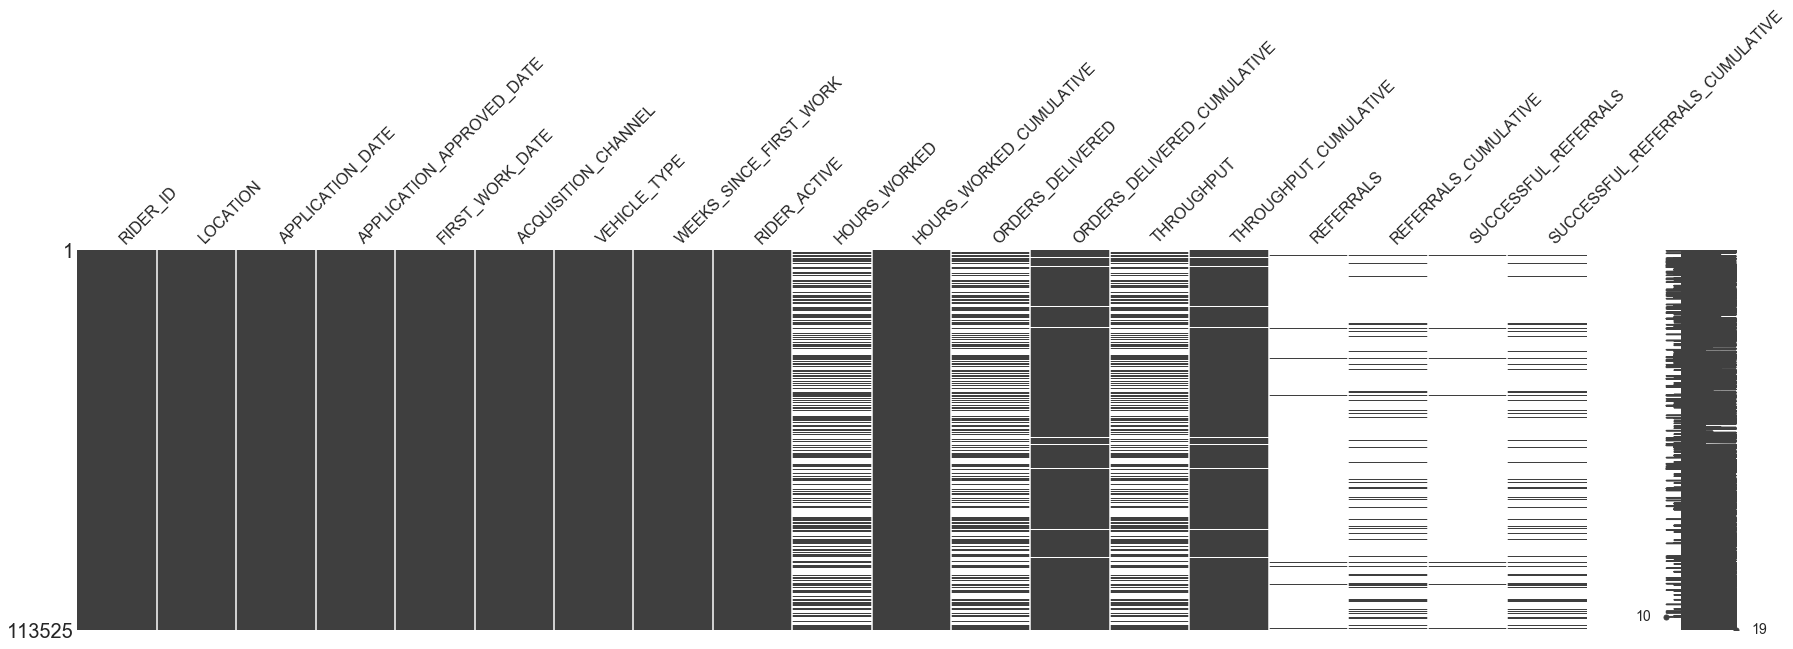

In [10]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_raw
msno.matrix(df_raw, figsize = (30, 7))

In [11]:
# Counts of missing values
null_value_stats = df_raw.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

HOURS_WORKED                        58524
ORDERS_DELIVERED                    61751
ORDERS_DELIVERED_CUMULATIVE          2163
THROUGHPUT                          61751
THROUGHPUT_CUMULATIVE                2163
REFERRALS                          111116
REFERRALS_CUMULATIVE                96457
SUCCESSFUL_REFERRALS               111116
SUCCESSFUL_REFERRALS_CUMULATIVE     96457
dtype: int64

Even though it is good practice to look at the NULL values in a new dataset, as stated in the brief, the dataset is clean and no data cleaning is required. We therefore will leave analysis of null values here.

Now we have created a pandas DataFrame, we'll next need to clean and wrangled the data to meet our needs for the Exploratory Data Analysis (EDA).

<a id='section4'></a>

## 4. Data Engineering

<a id='section4.1'></a>

### 4.1. Introduction
Before we answer the questions in the brief through Exploratory Data Analysis (EDA), we'll first need to munge and wrangle the data to be in a form that meet our needs.

<a id='section4.2'></a>

### 4.2. Data Wrangling
As stated in the brief, the dataset has 113,525 records in which one each row refers to one rider per week i.e. each of the 4,541 Riders has 25 rows of data (including week 0 as the week they joined).

For my analysis, I want to separate the latest version of each Rider's data, i.e. week 24, from the previous week's data, to analyse only their total performance of the Riders over the 24 week period. This will leave a dataset of 4,541 records, one per Rider, each with the total value of the following data points: `WEEKS_SINCE_FIRST_WORK`, `HOURS_WORKED_CUMULATIVE`, `ORDERS_DELIVERED_CUMULATIVE`, `THROUGHPUT_CUMULATIVE_REFERRALS`, `REFERRALS_CUMULATIVE`, and `SUCCESSFUL_REFERRALS_CUMULATIVE`.

To do this, we can take the rows only where `WEEKS_SINCE_FIRST_WORK` is equal to 24 i.e. the final week and create the new Dataframe that we'll be working with, using the standard naming convention `df`.

In [12]:
# Week 24 only of each Rider
df = df_raw.loc[df_raw['WEEKS_SINCE_FIRST_WORK'] == 24]

Again we will perform some of the data handling checks that we performed with the raw dataset in [section 3](#section3).

In [13]:
df.head()

,RIDER_ID,LOCATION,APPLICATION_DATE,APPLICATION_APPROVED_DATE,FIRST_WORK_DATE,ACQUISITION_CHANNEL,VEHICLE_TYPE,WEEKS_SINCE_FIRST_WORK,RIDER_ACTIVE,HOURS_WORKED,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT,THROUGHPUT_CUMULATIVE,REFERRALS,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS,SUCCESSFUL_REFERRALS_CUMULATIVE
24,1864,Roo York,05/03/2017,31/03/2017,03/04/2017,Digital,Scooter / Motorcycle,24,True,35.087779,820.883044,70.0,1977.0,1.994997,2.408382,NaN,1.0,NaN,1.0
49,3062,Roo York,03/10/2016,22/10/2016,30/10/2016,Offline,Bicycle,24,False,NaN,15.555832,NaN,26.0,NaN,1.671399,NaN,NaN,NaN,NaN
74,5276,Roo York,24/03/2017,31/03/2017,01/04/2017,Organic,Scooter / Motorcycle,24,False,NaN,23.326944,NaN,70.0,NaN,3.000822,NaN,1.0,NaN,0.0
99,9510,Roo York,05/10/2016,22/10/2016,28/10/2016,Digital,Bicycle,24,False,NaN,74.400552,NaN,97.0,NaN,1.303754,NaN,NaN,NaN,NaN
124,16977,Roo York,18/03/2017,20/03/2017,24/03/2017,Referral,Bicycle,24,False,NaN,23.710833,NaN,67.0,NaN,2.825713,NaN,NaN,NaN,NaN


In [14]:
df.tail()

,RIDER_ID,LOCATION,APPLICATION_DATE,APPLICATION_APPROVED_DATE,FIRST_WORK_DATE,ACQUISITION_CHANNEL,VEHICLE_TYPE,WEEKS_SINCE_FIRST_WORK,RIDER_ACTIVE,HOURS_WORKED,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT,THROUGHPUT_CUMULATIVE,REFERRALS,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS,SUCCESSFUL_REFERRALS_CUMULATIVE
113424,103762,Roo York,31/03/2017,07/04/2017,08/04/2017,Referral,Scooter / Motorcycle,24,True,19.114722,903.356102,59.0,2259.0,3.086626,2.500675,NaN,NaN,NaN,NaN
113449,103764,Roo York,20/03/2017,07/04/2017,07/04/2017,Referral,Scooter / Motorcycle,24,False,NaN,216.875004,NaN,321.0,NaN,1.480115,NaN,4.0,NaN,2.0
113474,103774,Roo York,26/02/2017,07/04/2017,07/04/2017,Organic,Scooter / Motorcycle,24,False,NaN,278.383333,NaN,783.0,NaN,2.812668,NaN,NaN,NaN,NaN
113499,103775,Roo York,25/03/2017,07/04/2017,07/04/2017,Referral,Scooter / Motorcycle,24,True,23.698056,338.583337,83.0,1107.0,3.502397,3.269505,NaN,5.0,NaN,1.0
113524,103776,Roo York,28/03/2017,07/04/2017,08/04/2017,Referral,Scooter / Motorcycle,24,False,NaN,285.996666,NaN,644.0,NaN,2.251775,NaN,NaN,NaN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4541 entries, 24 to 113524
Data columns (total 19 columns):
RIDER_ID                           4541 non-null int64
LOCATION                           4541 non-null object
APPLICATION_DATE                   4541 non-null object
APPLICATION_APPROVED_DATE          4541 non-null object
FIRST_WORK_DATE                    4541 non-null object
ACQUISITION_CHANNEL                4541 non-null object
VEHICLE_TYPE                       4541 non-null object
WEEKS_SINCE_FIRST_WORK             4541 non-null int64
RIDER_ACTIVE                       4541 non-null bool
HOURS_WORKED                       1319 non-null float64
HOURS_WORKED_CUMULATIVE            4541 non-null float64
ORDERS_DELIVERED                   1223 non-null float64
ORDERS_DELIVERED_CUMULATIVE        4464 non-null float64
THROUGHPUT                         1223 non-null float64
THROUGHPUT_CUMULATIVE              4464 non-null float64
REFERRALS                          74 non-null f

In [16]:
df.describe()

,RIDER_ID,WEEKS_SINCE_FIRST_WORK,HOURS_WORKED,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT,THROUGHPUT_CUMULATIVE,REFERRALS,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS,SUCCESSFUL_REFERRALS_CUMULATIVE
count,4541.000000,4541.0,1319.000000,4541.000000,1223.000000,4464.000000,1223.000000,4464.000000,74.000000,1002.000000,74.000000,1002.000000
mean,80873.171989,24.0,19.372840,197.829756,50.528209,440.673835,2.403633,1.990289,1.270270,2.589820,0.310811,0.561876
std,12799.731993,0.0,16.926589,259.929947,43.825879,621.260672,0.717144,0.667197,2.216361,9.369239,0.547114,1.215396
min,1864.000000,24.0,0.000000,0.178888,1.000000,1.000000,0.056955,0.025861,0.000000,0.000000,0.000000,0.000000
25%,70838.000000,24.0,5.693751,29.188333,15.000000,53.000000,1.965016,1.568525,1.000000,1.000000,0.000000,0.000000
50%,77621.000000,24.0,14.942779,90.675278,38.000000,172.000000,2.440885,2.051430,1.000000,1.000000,0.000000,0.000000
75%,94220.000000,24.0,30.296527,262.693056,75.000000,573.250000,2.888611,2.461074,1.000000,3.000000,1.000000,1.000000
max,103776.000000,24.0,89.775555,2075.802227,251.000000,5046.000000,5.396876,5.191057,19.000000,285.000000,2.000000,28.000000


The new dataset, `df`, is now only 1/25 of it's original size, containing only the final row for each Rider and their total performance in the recorded metrics. The original dataset is still accessible using the DataFrame `df_raw`.

<a id='section4.3'></a>

### 4.3. Exporting the Engineered DataFrame
Let's export the reduced DataFrame, `df`, as a CSV file using the [.to_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) method, so that this data can be accessed by others outside a Jupyter notebook who may not be able to merge the data e.g. if you wanted to plot this data in Excel. This file will be saved as `df_wk25`.

In [17]:
df.to_csv("./data/df_wk25.csv")

Next we will explore the new DataFrame and plot the key metrics for further analysis.

<a id='section4'></a>

## 5. Exploratory Data Analysis

The Exploratory Data Analysis aims to answer the question, **“Is the RGR scheme successful, and if so, how have you reached that conclusion?”**.

As per the project brief, I will separate my answer to this section into the following three subsections:
*    Defining what success is ([Section 5.1](#section5.1))
*    How has RGR performed compared with other channels? ([Section 5.2](#section5.2))
*    How does rider performance / behaviour vary between the channels? ([Section 5.3](#section5.3))

We will be using the [pandas](http://pandas.pydata.org/) library for manipulating the DataFrames and the [Seaborn](https://seaborn.pydata.org/) library for plotting.

<a id='section5.1'></a>

### 5.1. Definition of a Successful RGR scheme

Some gig economy startups can have a turnover of staff as high as 500% per year ([source 1](https://www.businessinsider.com/uber-lyft-drivers-livable-wage-complaints-2019-5?r=US&IR=T)) and ([source 2](https://www.td.org/insights/has-the-gig-economy-jumped-the-shark)). It is therefore important for these companies to focus on recruitment, how it can be done smarter, and at a reduced cost.

It is difficult to define what success for an RGR scheme would be, I would consider the following three components:
*    a system whereby current staff recommend a sufficient number potential employees to the application process,
*    of those candidates that apply, a significant percentage meet the standards to be eligible to work for the company, and
*    of these potential employees, those that are hired perform go on to meet the required standards and expected commitment to the role.

These three requirements are analysed in much further detail in the following sections [5.2](#section5.2) and [5.3](#section5.3).

To throw out some rough numbers, if for every two members of staff, one potential employee can be referred and then of those candidates, 1/4 are successful, I would say that is quite a successful recruitment process.

Let's take a look at the rough numbers for our dataset:

In [18]:
total_riders = df['RIDER_ID'].count()
total_referrals = df['REFERRALS_CUMULATIVE'].sum()
total_successful_referrals = df['SUCCESSFUL_REFERRALS_CUMULATIVE'].sum()

print("Total Riders: " + str(total_riders))
print("Total Referrals: " + str(total_referrals))
print("Total Successful Referrals: " + str(total_successful_referrals))

print("Rate of Successful Referalls to Referrals (%): " + str(round((total_successful_referrals/total_referrals * 100),1)) + "%")
print("Rate of Successful Referalls to Riders (%): " + str(round((total_successful_referrals/total_riders * 100),1)) + "%")

Total Riders: 4541
Total Referrals: 2595.0
Total Successful Referrals: 563.0
Rate of Successful Referalls to Referrals (%): 21.7%
Rate of Successful Referalls to Riders (%): 12.4%


Looking at the overall dataset, of the 4,531 Riders, 2,595 referrals were made and of these referrals, 563 were successful. That means that for every candidate, 0.573 candidates are referred and 0.124 successful candidates are referred. Of the candidates that are referred, the success rate is about 21.7% i.e. 1 in 5. Looking at these rough numbers, I would suggest that Deliveroo's RGR scheme is extremely productive. We will however dive much deeper into these numbers in the following sections.

To make better comments on defining what is a successful RGR scheme, I would like to know what the turnover rate of Riders for Deliveroo and the average length of employment of Riders with the company, for example.

<a id='section5.2'></a>

### 5.2. How has the RGR Scheme's Performance Compare with other Channels?

Let's plot the data for Riders by Acquisition Channel to see the volumes of Riders recruited by each different channel. These are:
*    Digital
*    Job Platforms
*    Offline
*    Organic
*    Referral

#### Plot the data

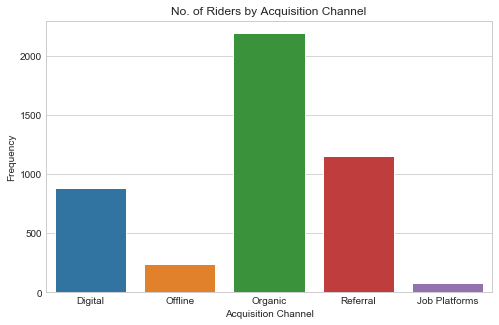

In [19]:
# Set the width and height of the figure
plt.figure(figsize=(8,5))

# Plot style
sns.set_style("whitegrid")

# Add title
plt.title("No. of Riders by Acquisition Channel")

# Bar chart showing 
sns_plot_4_2 = sns.countplot(df['ACQUISITION_CHANNEL'])

# Add labels for axes
plt.xlabel("Acquisition Channel")
plt.ylabel("Frequency")

# Save plot
fig_4_2 = sns_plot_4_2.get_figure()
fig_4_2.savefig("./figures/4_2.png") 

In [20]:
print(df['ACQUISITION_CHANNEL'].describe())

count        4541
unique          5
top       Organic
freq         2190
Name: ACQUISITION_CHANNEL, dtype: object


In [21]:
print(df.groupby('ACQUISITION_CHANNEL')[['RIDER_ID']].count())

                     RIDER_ID
ACQUISITION_CHANNEL          
Digital                   882
Job Platforms              77
Offline                   242
Organic                  2190
Referral                 1150


#### Analysis
The data shows that of the 4,541 total Riders in the dataset, 1,150 joined Deliveroo through the Referral channel, making up just over a quarter (25.3%) of the total workforce. This is the second most popular Acquisition Channel after Organic, which makes up 2,190 of the Riders in the dataset (48.2%).

The key thing to notice here is that even though the Referral scheme is the second best Acquisition Measure, it is actually the best performing channel in which Deliveroo is actively involved in when driving recruitment. Half of the Riders in the dataset came are said to have come to Deliveroo Organically which presumably means that Deliveroo had no active participation in finding the Riders before their application.

When comparing channel to Job Platforms, presumably sites like [LinkedIn](https://uk.linkedin.com), [Indeed](https://www.indeed.co.uk), [Monster](https://www.monster.co.uk), [Reed](https://www.reed.co.uk/) etc., this channel recruited only 77 Riders (1.70% of the Riders in the dataset). The next best Acquisition Channel is Digital, making up a considerable number of the Riders with 882 (19.4% of the dataset). Offline makes up the remaining 242 Riders (5.33%).

Considering quarter of the Riders came to Deliveroo through Referrals and it is the best performing active measure, I would say I would say that the RGR scheme is performing very well and is a key component for Deliveroo maintaining its staff and high performance levels regarding the delivery of the food.

<a id='section5.3'></a>

### 5.3. How does Rider Performance / Behaviour vary between the Channels?

#### Wrangle the data
For this section, before we can make any plots, we need to wrangle the data to a form that's more suited to our needs. We need to take the existing DataFrame of Riders data for the 24th week, `df`, and use the [groupby](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) and [aggregate](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html) methods to create a new DataFrame, `df_channel`, that counts the number of Riders in each channel by unique rider id and the total sum for key performance metrics.

For this exercise, the first performance metrics are: Hours Worked, Cumulative Orders Delivered, Orders Delivered Cumulative, and Cumulative Throughput. We will also next look at Cummulative Referrals, and Cumulative Successful Referrals to see the 'performance' of the Riders regarding the referring new candidates to the business.

Using this new DataFrame, we can produce calibrated metrics (discussed further in next steps) that take averages per Rider and use these create plots that determine the performance and behaviour of the Riders by channel.

The code for this is as follows:

In [22]:
# Created groupedby DataFrame, by channel
df_channel = df.groupby(
   ['ACQUISITION_CHANNEL']
).agg(
    {
         'RIDER_ID': 'count',                        # the total number of Riders
         'HOURS_WORKED_CUMULATIVE': 'sum',           # the sum total of cumulative hours worked
         'ORDERS_DELIVERED_CUMULATIVE': 'sum',       # the sum total of cumulative delivered orders
         'THROUGHPUT_CUMULATIVE': 'sum',             # the sum total of cumulative throughput
         'REFERRALS_CUMULATIVE': 'sum',              # the sum total of cumulative referrals
         'SUCCESSFUL_REFERRALS_CUMULATIVE': 'sum'    # the sum total of cumulative successful referrals
    }
).reset_index()

# Rename the RIDER_ID column to TOTAL_RIDERS
df_channel = df_channel.rename(columns={'RIDER_ID':'TOTAL_RIDERS'})

df_channel

,ACQUISITION_CHANNEL,TOTAL_RIDERS,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT_CUMULATIVE,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS_CUMULATIVE
0,Digital,882,140313.938052,292481.0,1625.277691,533.0,75.0
1,Job Platforms,77,14923.873923,32032.0,139.768841,6.0,3.0
2,Offline,242,37820.421062,79032.0,434.241888,113.0,17.0
3,Organic,2190,407886.645300,924513.0,4453.435329,962.0,193.0
4,Referral,1150,297400.045266,639110.0,2231.928393,981.0,275.0


In [23]:
df_channel.dtypes

ACQUISITION_CHANNEL                 object
TOTAL_RIDERS                         int64
HOURS_WORKED_CUMULATIVE            float64
ORDERS_DELIVERED_CUMULATIVE        float64
THROUGHPUT_CUMULATIVE              float64
REFERRALS_CUMULATIVE               float64
SUCCESSFUL_REFERRALS_CUMULATIVE    float64
dtype: object

As previously discussed in [Section 5.2](#section5.2) and again in the grouped table, `df_channel`, we have different numbers of Riders for each of the Acquisition Channels. We will therefore calibrate the metrics in question regarding performance, these being: `HOURS_WORKED_CUMULATIVE`, `ORDERS_DELIVERED_CUMULATIVE`, `THROUGHPUT_CUMULATIVE`, `REFERRALS_CUMULATIVE`, and `SUCCESSFUL_REFERRALS_CUMULATIVE`. These will be calibrated by taken an average per rider i.e. dividing the sum total by the number of Riders. These new metrics can be identified with the suffix '\_PR' (per rider) e.g. `HOURS_WORKED_CUMULATIVE_PR` is the cumulative hours worked per rider.

In [24]:
# Create per Rider (PR) columns
df_channel['HOURS_WORKED_CUMULATIVE_PR'] = df_channel['HOURS_WORKED_CUMULATIVE'] / df_channel['TOTAL_RIDERS']
df_channel['ORDERS_DELIVERED_CUMULATIVE_PR'] = df_channel['ORDERS_DELIVERED_CUMULATIVE'] / df_channel['TOTAL_RIDERS']
df_channel['THROUGHPUT_CUMULATIVE_PR'] = df_channel['THROUGHPUT_CUMULATIVE'] / df_channel['TOTAL_RIDERS']
df_channel['REFERRALS_CUMULATIVE_PR'] = df_channel['REFERRALS_CUMULATIVE'] / df_channel['TOTAL_RIDERS']
df_channel['SUCCESSFUL_REFERRALS_CUMULATIVE_PR'] = df_channel['SUCCESSFUL_REFERRALS_CUMULATIVE'] / df_channel['TOTAL_RIDERS']

# Drop unnamed channel (created 2nd index)
df_channel = df_channel.loc[:, ~df_channel.columns.str.contains('^Unnamed')]

In [25]:
df_channel.head()

,ACQUISITION_CHANNEL,TOTAL_RIDERS,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT_CUMULATIVE,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS_CUMULATIVE,HOURS_WORKED_CUMULATIVE_PR,ORDERS_DELIVERED_CUMULATIVE_PR,THROUGHPUT_CUMULATIVE_PR,REFERRALS_CUMULATIVE_PR,SUCCESSFUL_REFERRALS_CUMULATIVE_PR
0,Digital,882,140313.938052,292481.0,1625.277691,533.0,75.0,159.086098,331.611111,1.842718,0.604308,0.085034
1,Job Platforms,77,14923.873923,32032.0,139.768841,6.0,3.0,193.816544,416.000000,1.815180,0.077922,0.038961
2,Offline,242,37820.421062,79032.0,434.241888,113.0,17.0,156.282732,326.578512,1.794388,0.466942,0.070248
3,Organic,2190,407886.645300,924513.0,4453.435329,962.0,193.0,186.249610,422.152055,2.033532,0.439269,0.088128
4,Referral,1150,297400.045266,639110.0,2231.928393,981.0,275.0,258.608735,555.747826,1.940807,0.853043,0.239130


You can now see the new DataFrame with the new per Rider metrics, including `HOURS_WORKED_CUMULATIVE_PR`, `ORDERS_DELIVERED_CUMULATIVE_PR`, `THROUGHPUT_CUMULATIVE_PR`, `REFERRALS_CUMULATIVE_PR`, `SUCCESSFUL_REFERRALS_CUMULATIVE_PR`, and `ORDERS_DELIVERED_PER_HOUR_PR`.

Before plotting this data, let's export the grouped and aggregated dataset in case we, or other analysts, would like to use it in future projects/analysis.

In [26]:
df_channel.to_csv(r'./data/rgr_take_home_v3_dataset_grouped.csv')

#### Plot the data

##### Plot 1: Average No. of Hours Worked per Rider by Acquisition Channel after 24 weeks

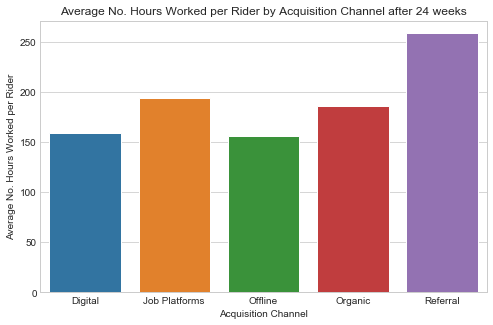

In [27]:
# Set the width and height of the figure
plt.figure(figsize=(8,5))

# Plot style
sns.set_style("whitegrid")

# Add title
plt.title("Average No. Hours Worked per Rider by Acquisition Channel after 24 weeks")

# Bar chart showing the Average No. Hours Worked per Rider by Acquisition Channel after 24 weeks
sns_plot_4_3a = sns.barplot(x=df_channel['ACQUISITION_CHANNEL'], y=df_channel['HOURS_WORKED_CUMULATIVE_PR'])

# Add labels for axes
plt.xlabel("Acquisition Channel")
plt.ylabel("Average No. Hours Worked per Rider")

# Save plot
fig_4_3a = sns_plot_4_3a.get_figure()
fig_4_3a.savefig("./figures/4_3a.png") 

##### Plot 2: Average No. of Orders Delivered per Rider by Acquisition Channel after 24 weeks

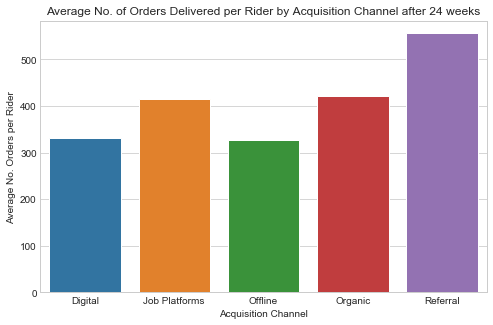

In [28]:
# Set the width and height of the figure
plt.figure(figsize=(8,5))

# Plot style
sns.set_style("whitegrid")

# Add title
plt.title("Average No. of Orders Delivered per Rider by Acquisition Channel after 24 weeks")

# Bar chart showing the Average No. of Orders Delivered per Rider by Acquisition Channel after 24 weeks
sns_plot_4_3b = sns.barplot(x=df_channel['ACQUISITION_CHANNEL'], y=df_channel['ORDERS_DELIVERED_CUMULATIVE_PR'])

# Add labels for axes
plt.xlabel("Acquisition Channel")
plt.ylabel("Average No. Orders per Rider")

# Save plot
fig_4_3b = sns_plot_4_3b.get_figure()
fig_4_3b.savefig("./figures/4_3b.png") 

##### Plot 3: Average Throughput per Rider by Acquisition Channel after 24 weeks

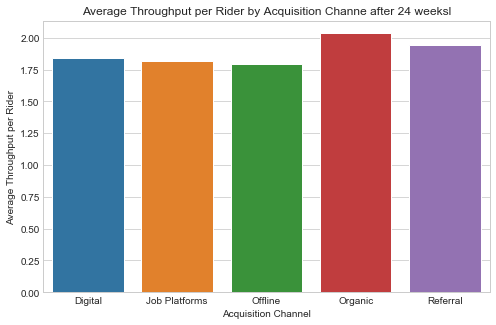

In [29]:
# Set the width and height of the figure
plt.figure(figsize=(8,5))

# Plot style
sns.set_style("whitegrid")

# Add title
plt.title("Average Throughput per Rider by Acquisition Channe after 24 weeksl")

# Bar chart showing the Average Throughput per Rider by Acquisition Channel after 24 weeks
sns_plot_4_3c = sns.barplot(x=df_channel['ACQUISITION_CHANNEL'], y=df_channel['THROUGHPUT_CUMULATIVE_PR'])

# Add labels for axes
plt.xlabel("Acquisition Channel")
plt.ylabel("Average Throughput per Rider")

# Save plot
fig_4_3c = sns_plot_4_3c.get_figure()
fig_4_3c.savefig("./figures/4_3c.png") 

##### Plot 4: Average No. of Referrals per Rider by Acquisition Channel after 24 weeks

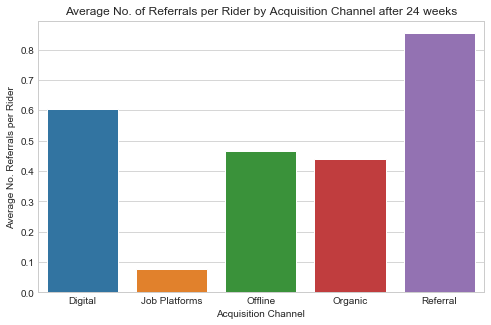

In [30]:
# Set the width and height of the figure
plt.figure(figsize=(8,5))

# Plot style
sns.set_style("whitegrid")

# Add title
plt.title("Average No. of Referrals per Rider by Acquisition Channel after 24 weeks")

# Bar chart showing the Average No. of Referrals per Rider by Acquisition Channel after 24 weeks
sns_plot_4_3d = sns.barplot(x=df_channel['ACQUISITION_CHANNEL'], y=df_channel['REFERRALS_CUMULATIVE_PR'])

# Add labels for axes
plt.xlabel("Acquisition Channel")
plt.ylabel("Average No. Referrals per Rider")

# Save plot
fig_4_3d = sns_plot_4_3d.get_figure()
fig_4_3d.savefig("./figures/4_3d.png") 

##### Plot 5: Average No. of Successful Referrals per Rider by Acquisition Channel after 24 weeks

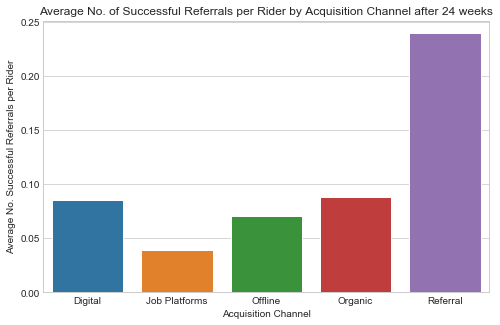

In [31]:
# Set the width and height of the figure
plt.figure(figsize=(8,5))

# Plot style
sns.set_style("whitegrid")

# Add title
plt.title("Average No. of Successful Referrals per Rider by Acquisition Channel after 24 weeks")

# Bar chart showing the Average No. of Successful Referrals per Rider by Acquisition Channel after 24 weeks
sns_plot_4_3e = sns.barplot(x=df_channel['ACQUISITION_CHANNEL'], y=df_channel['SUCCESSFUL_REFERRALS_CUMULATIVE_PR'])

# Add labels for axes
plt.xlabel("Acquisition Channel")
plt.ylabel("Average No. Successful Referrals per Rider")

# Save plot
fig_4_3e = sns_plot_4_3e.get_figure()
fig_4_3e.savefig("./figures/4_3e.png") 

#### Analysis
All analysis focuses on the Referral Acquisition Channel, comparing this to the other channels. Each of the five previous plots has a written paragraph, interpreting the results.

##### Plot 1: Average No. of Hours Worked per Rider by Acquisition Channel
For the first plot, the Average No. of Hours Worked per Rider by Acquisition Channel, the data shows that Riders who joined Deliveroo by Referral came out on top, with an average no. of 258.6 total hours worked per Rider after 24 weeks, averaging at 10.8 hours a week. For reference, Riders work on average 15 hours a week in the UK [(source)](https://roocommunity.com/tech-round-up-statistics/). Of the total Hours Worked by all Riders in the dataset, this makes up 27.1% of total Hours Worked, suggesting that the Referral Riders are the hardest working and most committed demographic. The four other platform's share of the total percentage ranges between 16.7% and 20.3%, the next best channel being by Job Platform, with an average hours worked of 193.8 (20.3%).

##### Plot 2: Average No. of Orders Delivered per Rider by Acquisition Channel
For the second plot, the Average No. of Orders Delivered per Rider by Acquisition Channel, the data shows that Riders who joined Deliveroo by Referral came out on top again, with an average no. of 555.7 orders delivered per Rider after 24 weeks. Of the total Orders Delivered by all Riders in the dataset, this makes up 27.1% of the total Orders Delivered, suggesting that the Referral Riders are the most productive demographic. The four other platform's share of the total percentage ranges between 15.9% and 20.6%, the next best channel being the Organic joiners, with an average Orders Delivered of 422.0 (20.6%).

##### Plot 3: Throughput per Rider by Acquisition Channel
As a quick reminder before discussing the third plot, the Cumlative Throughput is the cumulative orders per hour (orders / hours) of the Rider.

As we can see from the data, the Average Throughput per Rider by Acquisition Channel of Riders who joined Deliveroo by Referral again came out very strongly, overall placing second with an average Throughput per Rider of 2.03. Of the total sum of Throughput per Rider in the dataset, this makes up 20.6%, suggesting that the Referral Riders are the some of the most product Riders and are very efficient in delivering the most orders per hour, as possible. The other platform's share of the total percentage are all very close, ranging between 19.0% (Offline) and 21.6% (Organic).

My instinct with this observation is that the Vehicle Type may be a more interesting indicator to use when looking at the Throughput of the Riders. However, I believe it's interesting analysis and has some value being in this report.

##### Plot 4: Average No. of Referrals per Rider by Acquisition Channel
For the forth plot, the Average No. of Referrals per Rider by Acquisition Channel, the data shows that Riders who joined Deliveroo by Referral came out on top again, with an average no. of 0.853 Referrals per Rider after 24 weeks. Of the total Referrals by all Riders in the dataset, this makes up 34.9% of the total Referrals, suggesting that the Referral Riders are far more likely to Refer new Riders to the company. The four other platform's share of the total percentage ranges between 3.19% (Job Platforms) and 24.8% (Digital).


##### Plot 5: Average No. of Successful Referrals per Rider by Acquisition Channel
For the fifth plot, the Average No. of Successful Referrals per Rider by Acquisition Channel, the data shows that Riders who joined Deliveroo by Referral continued to observe the previous trends, again leading the channels with an average no. of 0.239 Successful per Rider after 24 weeks. Of the total Successful Referrals by all Riders in the dataset, this makes up 45.9% of the total Successful Referrals, suggesting that not only are the Referral Riders are far more likely to Refer other Riders to the company (as seen in plot 4), but they are also far more likely to refer successful candidates. The four other platform's share of the total percentage ranges between 7.47% (Job Platforms) and 16.9% (Organic).

<a id='section6'></a>

## 6. Summary and Conclusion

This workbook was a short Exploratory Data Analysis (EDA) of Rider data for [Deliveroo](https://deliveroo.co.uk/), analysing the performance of the 'Rider Get Rider' (RGR) scheme.

To answer the question “Is the RGR scheme successful and why?" using our limited dataset and restricted time for analysis, I believe that the answer is a resounding, **Yes!** 

Our analysis was divided into three sections: 1) We defined what a successful RGR scheme is; 2) We looked at how the RGR scheme performed compared with other channels; and 3) We analysed how Rider's performance and behaviour depending on their channel of recruitment.

We first looked define what success of the RGR scheme would be. We first conducting some research of the employment and turnover rates of similiar companies and then compared some high-level figures of our dataset of 4,541 Riders.

We next compared how the RGR scheme stood up in comparison with the other avenues in which Riders joined Deliveroo. The data showed that 1,150 employees joined Deliveroo through the Referral channel, making up just over a quarter (25.3%) of the workforce in the dataset, second only to Organic (48.2%), a demographic which is inherently our of Deliveroo's control. This therefore suggests that Referrals is Deliveroo's best active form of recruitment.

Finally, we next took our DataFrame and calibrated the key performance metrics of the Riders to determine average 'per Rider' values over the 24 week period for: Hours Worked, Orders Delivered, Orders Delivered, Throughput, Referrals, and Successful Referrals. Our plots show that in all but one of the categories, Referred Riders outperform other Riders in regarding these metrics, except for Throughput where Referrals placed second and as discussed in section 4.3, all channels performed quite simularly and I have suspicious that it's the form of transport that would have greater effect on improving this number i.e. using a car and not a bike.

To conclude, not only does our data suggest that the 'Rider Get Rider' scheme a great way for Deliveroo to find new employees, it also suggests that these employees are some of the most productive, hardest working and efficient Riders in the business. The data also suggests that Riders who joined the business through the Referral scheme are more likely to go on to refer more future Riders and with a greater success rate.

<a id='section7'></a>

## 7. Next Steps

Some of the metrics and avenues not touched but may be of interest include:
*    Further address our definition of success using additional data of Riders including the turnover rate of Rider, the average length of employement of Riders with the company, for example.
*    Further analysis of the Rider's `VEHICLE_TYPE`, especially when considering it's effect on `THROUGHPUT` i.e. do car drivers deliver more orders per hours than cyclists.
*    Further analysis of the Rider `LOCATION`. We could maybe create a heatmap of Location vs. Aquisition Channel and see the hot spots.
*    Further analysis of the Rider's `RIDER_ACTIVITY` i.e. TRUE or FALSE. Does further inspection show any patterns?

<a id='section8'></a>

## 8. Revision of First Submission
Since my first report submission of this dataset on 14/12/2019 (48 days ago since today's interview), I've had some time go away and think about my findings. I had to opportunity to read more about Deliveroo, conduct some more research about factors that affect business and the Riders, including some that I believe would affect the RGR scheme and the performance of Deliveroo Riders.

Upon the first submission, the dataset produced pleasingly positive results. the RGR scheme was shown to be the second best recruitment channel after organic means, and the RGR-recruited riders were shown to be the most productive (most av. orders delivered), hardest working (most av. amount hours worked) and efficient Riders (highest through-put) in the business. The data also showed that RGR-recruited riders were more likely to go on to refer more future Riders and with a greater success rate.

However, in the limited four-hour time limit that I had to complete the report, I did not have time to conduct further analysis, including segmenting the data further by other features. In my first submission, I had taken the dataset, as a whole, and then assessed the the performance of metrics `HOURS_WORKED_CUMULATIVE`, `ORDERS_DELIVERED_CUMULATIVE`, `THROUGHPUT_CUMULATIVE`, `REFERRALS_CUMULATIVE`, and `SUCCESSFUL_REFERRALS_CUMULATIVE`, without further segmentation. I would however, I as stated in my original [Conclusion](#section6) and [Next Steps](#section7) sections that the data could be further analysed by both `LOCATION` and `VEHICLE_TYPE`.

In this revised report, I have included this new section which delves more into these two features and look deeper at the dataset to see if there are any hidden insights in the data that were not first spotted.

<a id='section8.1'></a>

### 8.1. Location

Let's start by looking at the different Locations of the Riders in which the data of this dataset was collected, along with their counts.

In [32]:
df['LOCATION'].value_counts()

Roo York          2921
Roo de Janeiro    1327
Roo Town           293
Name: LOCATION, dtype: int64

As we can see, the total number of Riders in our dataset working in 'Roo York' makes up about 64% of the total dataset with 2,921 Riders. Roo de Janiero makes up 29% with 1,327 Riders. Roo Town is much smaller in comparison, making up about 6.5% of the dataset with 293 riders.

My initial questions are, why are the reasons for this split? Was stratified sampling used and is this sample representative of the actual population? Are all the markets in each of these different Locations mature enough to have a more equally balanced number of Riders. These are just some of my starting questions.

Next, let's segment the original dataset by location, ready to be used for further analysis in sections 8.1.1 and 8.1.2, where I will reanswer the questions as set out in the brief.

In [33]:
# Create seperate DataFrames the dataset by Location
df_roo_york = df.loc[df['LOCATION'] == "Roo York"]
df_roo_de_janeiro = df.loc[df['LOCATION'] == "Roo de Janeiro"]
df_roo_town = df.loc[df['LOCATION'] == "Roo Town"]

In [34]:
df_roo_york.head()

,RIDER_ID,LOCATION,APPLICATION_DATE,APPLICATION_APPROVED_DATE,FIRST_WORK_DATE,ACQUISITION_CHANNEL,VEHICLE_TYPE,WEEKS_SINCE_FIRST_WORK,RIDER_ACTIVE,HOURS_WORKED,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT,THROUGHPUT_CUMULATIVE,REFERRALS,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS,SUCCESSFUL_REFERRALS_CUMULATIVE
24,1864,Roo York,05/03/2017,31/03/2017,03/04/2017,Digital,Scooter / Motorcycle,24,True,35.087779,820.883044,70.0,1977.0,1.994997,2.408382,NaN,1.0,NaN,1.0
49,3062,Roo York,03/10/2016,22/10/2016,30/10/2016,Offline,Bicycle,24,False,NaN,15.555832,NaN,26.0,NaN,1.671399,NaN,NaN,NaN,NaN
74,5276,Roo York,24/03/2017,31/03/2017,01/04/2017,Organic,Scooter / Motorcycle,24,False,NaN,23.326944,NaN,70.0,NaN,3.000822,NaN,1.0,NaN,0.0
99,9510,Roo York,05/10/2016,22/10/2016,28/10/2016,Digital,Bicycle,24,False,NaN,74.400552,NaN,97.0,NaN,1.303754,NaN,NaN,NaN,NaN
124,16977,Roo York,18/03/2017,20/03/2017,24/03/2017,Referral,Bicycle,24,False,NaN,23.710833,NaN,67.0,NaN,2.825713,NaN,NaN,NaN,NaN


In [35]:
df_roo_york['LOCATION'].value_counts()

Roo York    2921
Name: LOCATION, dtype: int64

In [36]:
df_roo_york.shape

(2921, 19)

Now that our data is correctly segemented, let's go back and answer the questions in the brief. I'll repeat this in same way as per the first submission in sections [5.2](#section5.2) and [5.3](#section5.3):
*    **How has RGR performed compared with other channels?**
*    **How does rider performance / behaviour vary between the channels?**

<a id='section8.1.1'></a>

#### 8.1.1. How has the RGR Scheme's Performance Compare with other Channels?
The dataset will be plotted as per [Section 5.2](#section5.2) of the original report with the number of riders by Acquisition Channel to see the volumes of Riders recruited by each different channel. Except this time, there are three subplots each seperated by `LOCATION`.

As a reminder, the five different channels are:
*    Digital
*    Job Platforms
*    Offline
*    Organic
*    Referral

#### Plot the data

/Users/eddwebster/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


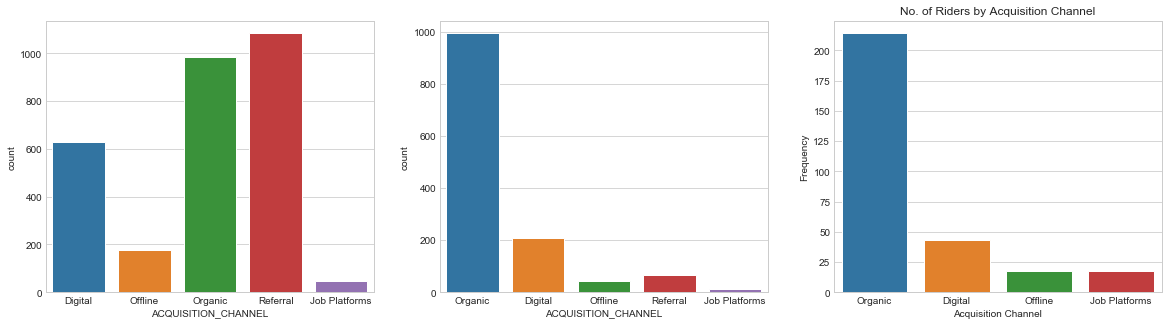

In [37]:
# Set the width, height and subplots of the figure
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

# Plot style
sns.set_style("whitegrid")

# Add title
plt.title("No. of Riders by Acquisition Channel")

# Bar chart showing 
sns_plot_8_2_1 = sns.countplot(df_roo_york['ACQUISITION_CHANNEL'], ax=ax[0])
sns_plot_8_2_2 = sns.countplot(df_roo_de_janeiro['ACQUISITION_CHANNEL'], ax=ax[1])
sns_plot_8_2_3 = sns.countplot(df_roo_town['ACQUISITION_CHANNEL'], ax=ax[2])

# Add labels for axes
plt.xlabel("Acquisition Channel")
plt.ylabel("Frequency")

# Save plots
fig_8_1_1 = sns_plot_8_2_1.get_figure()
fig_8_1_1.savefig("./figures/revised/8_1_1.png") 

fig_8_1_2 = sns_plot_8_2_2.get_figure()
fig_8_1_2.savefig("./figures/revised/8_1_2.png") 

fig_8_1_3 = sns_plot_8_2_3.get_figure()
fig_8_1_3.savefig("./figures/revised/8_1_3.png") 

# Show figure
fig.show()

In [38]:
print(df_roo_york['ACQUISITION_CHANNEL'].describe())
print(df_roo_de_janeiro['ACQUISITION_CHANNEL'].describe())
print(df_roo_town['ACQUISITION_CHANNEL'].describe())

count         2921
unique           5
top       Referral
freq          1083
Name: ACQUISITION_CHANNEL, dtype: object
count        1327
unique          5
top       Organic
freq          993
Name: ACQUISITION_CHANNEL, dtype: object
count         293
unique          4
top       Organic
freq          214
Name: ACQUISITION_CHANNEL, dtype: object


In [39]:
print(df_roo_york.groupby('ACQUISITION_CHANNEL')[['RIDER_ID']].count())
print(df_roo_de_janeiro.groupby('ACQUISITION_CHANNEL')[['RIDER_ID']].count())
print(df_roo_town.groupby('ACQUISITION_CHANNEL')[['RIDER_ID']].count())

                     RIDER_ID
ACQUISITION_CHANNEL          
Digital                   629
Job Platforms              47
Offline                   179
Organic                   983
Referral                 1083
                     RIDER_ID
ACQUISITION_CHANNEL          
Digital                   210
Job Platforms              12
Offline                    45
Organic                   993
Referral                   67
                     RIDER_ID
ACQUISITION_CHANNEL          
Digital                    43
Job Platforms              18
Offline                    18
Organic                   214


#### Analysis
We have plotted the data by Acquisition Channel type, with the Riders seperated onto three plots by `LOCATION`. As we can see, the trends regarding acquisition channel are not as clear cut as we'd originally thought.

In our original analysis of the overall dataset in [Section 5.2](#section5.2), we saw that a quarter of the riders (25.3%) joined Deliveroo through the RGR scheme, the second most popular Acquisition Channel after Organic, which makes up just under half the dataset (48.2%). However, when we segment this by `LOCATION`, we can see clear variations depending on the Location.

When looking at the three data subsets side-by-side, Roo York, which makes up 64% of the total dataset, it is observed that the RGR referral scheme is doing even better than originally thought, appearing to be the number one recruitment method with 1,083 Riders (37%), even higher than Organic with 938 Riders (33.7%).

However, when we look at Roo de Janeiro, which makes up 29% of the total data set, the data tells a different story. In this plot, we can see that Organic absolutely dwarfs RGR scheme with 993 riders (74.8%). The next best channel is Digital with around 210 Riders (15.8%). Referral places in third with just 67 Riders (5.05%), showing the scheme to be performing significantly worse in this zone.

Most interesting, we can see when isolating Riders in Roo Town, whic makes up a small subset of the full dataset with 6.5% of the Riders (293), we can see that no Riders in the dataset came through the RGR scheme, with the column missing altogether. All the Riders come from 'Digital', 'Offline', 'Organic', and 'Job Platforms', the highest being organic with 214 Riders (73.0%). So the question is, why is this the case? Has the RGR scheme not been introduced in this location yet? Maybe the scheme is present but by chance no Riders came through the scheme. The dataset, though small, does seem large enough to show that some Riders would come through this method if the scheme was in place (293 Riders). Maybe the scheme has been introduced but within the 24 week window and is therefore not at a suitable level of maturity to be shown in this dataset suitable to be included in this dataset.

From this analysis we have found our first example of **selection bias** in that proper randomisation was not achieved when selecting Riders from different locations.


#### Conclusions
After discovering around 6.5% of the total datset has not been randomised properly and cannot be used to answer the questions of the RGR scheme effectiveness, I can now comment that the analysis in [Section 5.2](#section5.2) and [Section 5.3](#section5.3) will be slightly skewed.

Upon repetition of this report, I would now repeat all my previous analysis but remove all Roo Town data from the dataset to eliminate selection bias from analysis of the RGR scheme.

<a id='section8.1.2'></a>

#### 8.1.2. How does Rider Performance / Behaviour vary between the Channels?

Again, the dataset will be against the five different performance metrics as per [Section 5.3](#section5.3) in the original report, with each of the three subsets of data plotted against each other side-by-side.

As a reminder, these five metrics are:
*    `HOURS_WORKED_CUMULATIVE`,
*    `ORDERS_DELIVERED_CUMULATIVE`,
*    `THROUGHPUT_CUMULATIVE`,
*    `REFERRALS_CUMULATIVE`, and
*    `SUCCESSFUL_REFERRALS_CUMULATIVE`.

#### Group the data
Before any plotting can be done, in the same way as was done in [Section 5.3](#section5.3), I need to create new grouped DataFrames, but this time with our new subset DataFrames per each of the three lcoations.

In [40]:
# Created groupedby DataFrame, by channel, for Roo York
df_channel_roo_york = df_roo_york.groupby(
   ['ACQUISITION_CHANNEL']
).agg(
    {
         'RIDER_ID': 'count',                        # the total number of Riders
         'HOURS_WORKED_CUMULATIVE': 'sum',           # the sum total of cumulative hours worked
         'ORDERS_DELIVERED_CUMULATIVE': 'sum',       # the sum total of cumulative delivered orders
         'THROUGHPUT_CUMULATIVE': 'sum',             # the sum total of cumulative throughput
         'REFERRALS_CUMULATIVE': 'sum',              # the sum total of cumulative referrals
         'SUCCESSFUL_REFERRALS_CUMULATIVE': 'sum'    # the sum total of cumulative successful referrals
    }
).reset_index()

# Rename the RIDER_ID column to TOTAL_RIDERS
df_channel_roo_york = df_channel_roo_york.rename(columns={'RIDER_ID':'TOTAL_RIDERS'})

# Create per Rider (PR) columns
df_channel_roo_york['HOURS_WORKED_CUMULATIVE_PR'] = df_channel_roo_york['HOURS_WORKED_CUMULATIVE'] / df_channel_roo_york['TOTAL_RIDERS']
df_channel_roo_york['ORDERS_DELIVERED_CUMULATIVE_PR'] = df_channel_roo_york['ORDERS_DELIVERED_CUMULATIVE'] / df_channel_roo_york['TOTAL_RIDERS']
df_channel_roo_york['THROUGHPUT_CUMULATIVE_PR'] = df_channel_roo_york['THROUGHPUT_CUMULATIVE'] / df_channel_roo_york['TOTAL_RIDERS']
df_channel_roo_york['REFERRALS_CUMULATIVE_PR'] = df_channel_roo_york['REFERRALS_CUMULATIVE'] / df_channel_roo_york['TOTAL_RIDERS']
df_channel_roo_york['SUCCESSFUL_REFERRALS_CUMULATIVE_PR'] = df_channel_roo_york['SUCCESSFUL_REFERRALS_CUMULATIVE'] / df_channel_roo_york['TOTAL_RIDERS']

# Drop unnamed channel (created 2nd index)
df_channel_roo_york = df_channel_roo_york.loc[:, ~df_channel_roo_york.columns.str.contains('^Unnamed')]

df_channel_roo_york

,ACQUISITION_CHANNEL,TOTAL_RIDERS,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT_CUMULATIVE,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS_CUMULATIVE,HOURS_WORKED_CUMULATIVE_PR,ORDERS_DELIVERED_CUMULATIVE_PR,THROUGHPUT_CUMULATIVE_PR,REFERRALS_CUMULATIVE_PR,SUCCESSFUL_REFERRALS_CUMULATIVE_PR
0,Digital,629,87645.984502,173623.0,1092.205154,483.0,68.0,139.341788,276.030207,1.736415,0.767886,0.108108
1,Job Platforms,47,6931.919463,14703.0,78.861887,6.0,3.0,147.487648,312.829787,1.677912,0.127660,0.063830
2,Offline,179,26670.008550,53507.0,301.749368,99.0,16.0,148.994461,298.921788,1.685751,0.553073,0.089385
3,Organic,983,155018.604892,332622.0,1846.657317,503.0,146.0,157.699496,338.374364,1.878593,0.511699,0.148525
4,Referral,1083,282499.823819,602053.0,2072.955823,892.0,262.0,260.849329,555.912281,1.914087,0.823638,0.241921


In [41]:
# Created groupedby DataFrame, by channel, for Roo de Janeiro
df_channel_roo_de_janeiro = df_roo_de_janeiro.groupby(
   ['ACQUISITION_CHANNEL']
).agg(
    {
         'RIDER_ID': 'count',                        # the total number of Riders
         'HOURS_WORKED_CUMULATIVE': 'sum',           # the sum total of cumulative hours worked
         'ORDERS_DELIVERED_CUMULATIVE': 'sum',       # the sum total of cumulative delivered orders
         'THROUGHPUT_CUMULATIVE': 'sum',             # the sum total of cumulative throughput
         'REFERRALS_CUMULATIVE': 'sum',              # the sum total of cumulative referrals
         'SUCCESSFUL_REFERRALS_CUMULATIVE': 'sum'    # the sum total of cumulative successful referrals
    }
).reset_index()

# Rename the RIDER_ID column to TOTAL_RIDERS
df_channel_roo_de_janeiro = df_channel_roo_de_janeiro.rename(columns={'RIDER_ID':'TOTAL_RIDERS'})

# Create per Rider (PR) columns
df_channel_roo_de_janeiro['HOURS_WORKED_CUMULATIVE_PR'] = df_channel_roo_de_janeiro['HOURS_WORKED_CUMULATIVE'] / df_channel_roo_de_janeiro['TOTAL_RIDERS']
df_channel_roo_de_janeiro['ORDERS_DELIVERED_CUMULATIVE_PR'] = df_channel_roo_de_janeiro['ORDERS_DELIVERED_CUMULATIVE'] / df_channel_roo_de_janeiro['TOTAL_RIDERS']
df_channel_roo_de_janeiro['THROUGHPUT_CUMULATIVE_PR'] = df_channel_roo_de_janeiro['THROUGHPUT_CUMULATIVE'] / df_channel_roo_de_janeiro['TOTAL_RIDERS']
df_channel_roo_de_janeiro['REFERRALS_CUMULATIVE_PR'] = df_channel_roo_de_janeiro['REFERRALS_CUMULATIVE'] / df_channel_roo_de_janeiro['TOTAL_RIDERS']
df_channel_roo_de_janeiro['SUCCESSFUL_REFERRALS_CUMULATIVE_PR'] = df_channel_roo_de_janeiro['SUCCESSFUL_REFERRALS_CUMULATIVE'] / df_channel_roo_de_janeiro['TOTAL_RIDERS']

# Drop unnamed channel (created 2nd index)
df_channel_roo_de_janeiro = df_channel_roo_de_janeiro.loc[:, ~df_channel_roo_de_janeiro.columns.str.contains('^Unnamed')]

df_channel_roo_de_janeiro

,ACQUISITION_CHANNEL,TOTAL_RIDERS,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT_CUMULATIVE,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS_CUMULATIVE,HOURS_WORKED_CUMULATIVE_PR,ORDERS_DELIVERED_CUMULATIVE_PR,THROUGHPUT_CUMULATIVE_PR,REFERRALS_CUMULATIVE_PR,SUCCESSFUL_REFERRALS_CUMULATIVE_PR
0,Digital,210,38963.822197,90782.0,446.292601,49.0,6.0,185.542010,432.295238,2.125203,0.233333,0.028571
1,Job Platforms,12,2378.991394,6242.0,26.528769,0.0,0.0,198.249283,520.166667,2.210731,0.000000,0.000000
2,Offline,45,7630.501129,18020.0,93.962628,14.0,1.0,169.566692,400.444444,2.088058,0.311111,0.022222
3,Organic,993,202491.861592,488824.0,2176.105508,453.0,42.0,203.919297,492.269889,2.191446,0.456193,0.042296
4,Referral,67,14900.221447,37057.0,158.972570,89.0,13.0,222.391365,553.089552,2.372725,1.328358,0.194030


In [42]:
# Created groupedby DataFrame, by channel, for Roo Town
df_channel_roo_town = df_roo_town.groupby(
   ['ACQUISITION_CHANNEL']
).agg(
    {
         'RIDER_ID': 'count',                        # the total number of Riders
         'HOURS_WORKED_CUMULATIVE': 'sum',           # the sum total of cumulative hours worked
         'ORDERS_DELIVERED_CUMULATIVE': 'sum',       # the sum total of cumulative delivered orders
         'THROUGHPUT_CUMULATIVE': 'sum',             # the sum total of cumulative throughput
         'REFERRALS_CUMULATIVE': 'sum',              # the sum total of cumulative referrals
         'SUCCESSFUL_REFERRALS_CUMULATIVE': 'sum'    # the sum total of cumulative successful referrals
    }
).reset_index()

# Rename the RIDER_ID column to TOTAL_RIDERS
df_channel_roo_town = df_channel_roo_town.rename(columns={'RIDER_ID':'TOTAL_RIDERS'})

# Create per Rider (PR) columns
df_channel_roo_town['HOURS_WORKED_CUMULATIVE_PR'] = df_channel_roo_town['HOURS_WORKED_CUMULATIVE'] / df_channel_roo_town['TOTAL_RIDERS']
df_channel_roo_town['ORDERS_DELIVERED_CUMULATIVE_PR'] = df_channel_roo_town['ORDERS_DELIVERED_CUMULATIVE'] / df_channel_roo_town['TOTAL_RIDERS']
df_channel_roo_town['THROUGHPUT_CUMULATIVE_PR'] = df_channel_roo_town['THROUGHPUT_CUMULATIVE'] / df_channel_roo_town['TOTAL_RIDERS']
df_channel_roo_town['REFERRALS_CUMULATIVE_PR'] = df_channel_roo_town['REFERRALS_CUMULATIVE'] / df_channel_roo_town['TOTAL_RIDERS']
df_channel_roo_town['SUCCESSFUL_REFERRALS_CUMULATIVE_PR'] = df_channel_roo_town['SUCCESSFUL_REFERRALS_CUMULATIVE'] / df_channel_roo_town['TOTAL_RIDERS']

# Drop unnamed channel (created 2nd index)
df_channel_roo_town = df_channel_roo_town.loc[:, ~df_channel_roo_town.columns.str.contains('^Unnamed')]

df_channel_roo_town

,ACQUISITION_CHANNEL,TOTAL_RIDERS,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT_CUMULATIVE,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS_CUMULATIVE,HOURS_WORKED_CUMULATIVE_PR,ORDERS_DELIVERED_CUMULATIVE_PR,THROUGHPUT_CUMULATIVE_PR,REFERRALS_CUMULATIVE_PR,SUCCESSFUL_REFERRALS_CUMULATIVE_PR
0,Digital,43,13704.131353,28076.0,86.779936,1.0,1.0,318.700729,652.930233,2.018138,0.023256,0.023256
1,Job Platforms,18,5612.963066,11087.0,34.378185,0.0,0.0,311.831281,615.944444,1.909899,0.000000,0.000000
2,Offline,18,3519.911383,7505.0,38.529892,0.0,0.0,195.550632,416.944444,2.140550,0.000000,0.000000
3,Organic,214,50376.178816,103067.0,430.672504,6.0,5.0,235.402705,481.621495,2.012488,0.028037,0.023364


Now I am ready to plot the data.

#### Plot the Data

##### Plot 1: Average No. of Hours Worked per Rider by Acquisition Channel after 24 weeks

/Users/eddwebster/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


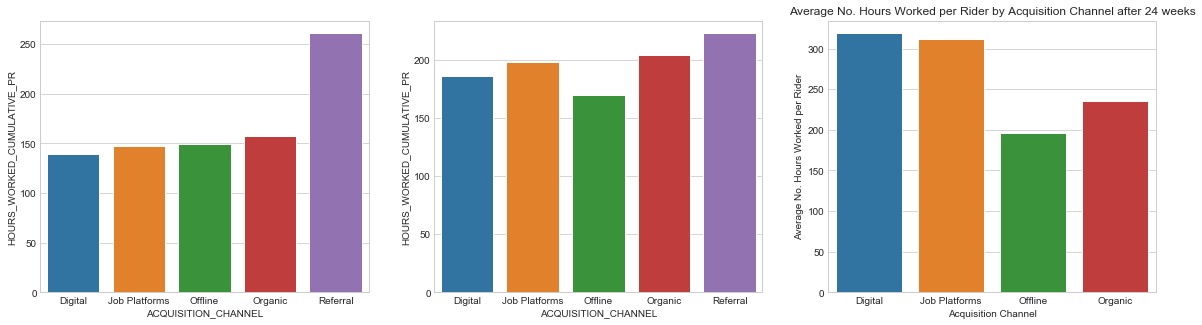

In [43]:
# Set the width, height and subplots of the figure
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

# Plot style
sns.set_style("whitegrid")

# Add title
plt.title("Average No. Hours Worked per Rider by Acquisition Channel after 24 weeks")

# Bar chart showing the Average No. Hours Worked per Rider by Acquisition Channel after 24 weeks
sns_plot_8_1_2_1 = sns.barplot(x=df_channel_roo_york['ACQUISITION_CHANNEL'], y=df_channel_roo_york['HOURS_WORKED_CUMULATIVE_PR'], ax=ax[0])
sns_plot_8_1_2_2 = sns.barplot(x=df_channel_roo_de_janeiro['ACQUISITION_CHANNEL'], y=df_channel_roo_de_janeiro['HOURS_WORKED_CUMULATIVE_PR'], ax=ax[1])
sns_plot_8_1_2_3 = sns.barplot(x=df_channel_roo_town['ACQUISITION_CHANNEL'], y=df_channel_roo_town['HOURS_WORKED_CUMULATIVE_PR'], ax=ax[2])

# Add labels for axes
plt.xlabel("Acquisition Channel")
plt.ylabel("Average No. Hours Worked per Rider")

# Save plots
fig_8_1_2_1 = sns_plot_8_1_2_1.get_figure()
fig_8_1_2_1.savefig("./figures/revised/8_1_2_1.png") 

fig_8_1_2_2 = sns_plot_8_1_2_2.get_figure()
fig_8_1_2_2.savefig("./figures/revised/8_1_2_2.png")

fig_8_1_2_3 = sns_plot_8_1_2_3.get_figure()
fig_8_1_2_3.savefig("./figures/revised/8_1_2_3.png") 

# Show figure
fig.show()

##### Plot 2: Average No. of Orders Delivered per Rider by Acquisition Channel after 24 weeks

/Users/eddwebster/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


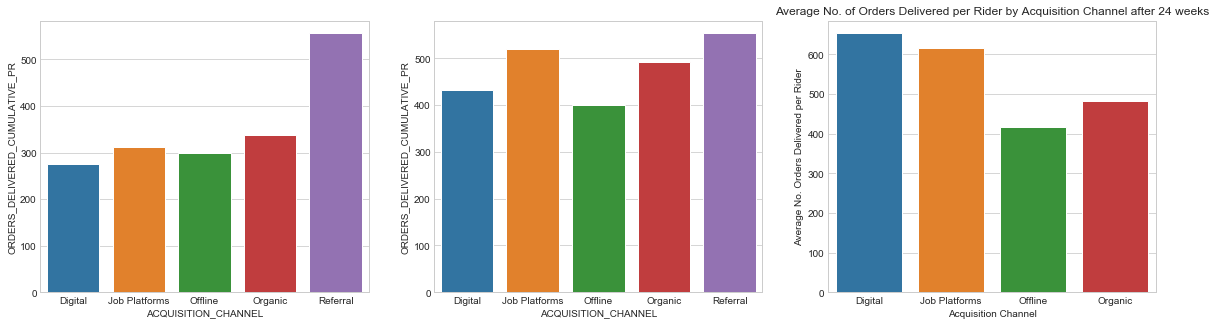

In [44]:
# Set the width, height and subplots of the figure
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

# Plot style
sns.set_style("whitegrid")

# Add title
plt.title("Average No. of Orders Delivered per Rider by Acquisition Channel after 24 weeks")

# Bar chart showing the Average No. of Orders Delivered per Rider by Acquisition Channel after 24 weeks
sns_plot_8_1_2_1 = sns.barplot(x=df_channel_roo_york['ACQUISITION_CHANNEL'], y=df_channel_roo_york['ORDERS_DELIVERED_CUMULATIVE_PR'], ax=ax[0])
sns_plot_8_1_2_2 = sns.barplot(x=df_channel_roo_de_janeiro['ACQUISITION_CHANNEL'], y=df_channel_roo_de_janeiro['ORDERS_DELIVERED_CUMULATIVE_PR'], ax=ax[1])
sns_plot_8_1_2_3 = sns.barplot(x=df_channel_roo_town['ACQUISITION_CHANNEL'], y=df_channel_roo_town['ORDERS_DELIVERED_CUMULATIVE_PR'], ax=ax[2])

# Add labels for axes
plt.xlabel("Acquisition Channel")
plt.ylabel("Average No. Orders Delivered per Rider")

# Save plots
fig_8_1_2_1 = sns_plot_8_1_2_1.get_figure()
fig_8_1_2_1.savefig("./figures/revised/8_1_2_1.png") 

fig_8_1_2_2 = sns_plot_8_1_2_2.get_figure()
fig_8_1_2_2.savefig("./figures/revised/8_1_2_2.png")

fig_8_1_2_3 = sns_plot_8_1_2_3.get_figure()
fig_8_1_2_3.savefig("./figures/revised/8_1_2_3.png") 

# Show figure
fig.show()

##### Plot 3: Throughput per Rider by Acquisition Channel

/Users/eddwebster/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


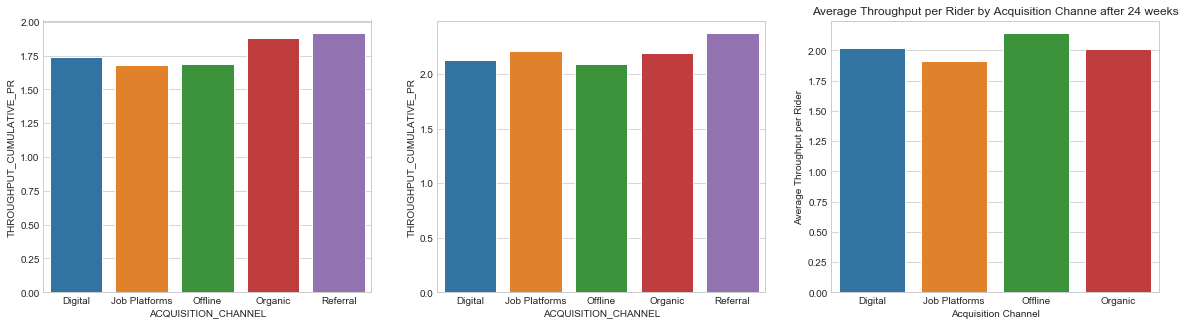

In [45]:
# Set the width, height and subplots of the figure
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

# Plot style
sns.set_style("whitegrid")

# Add title
plt.title("Average Throughput per Rider by Acquisition Channe after 24 weeks")

# Bar chart showing the Average Throughput per Rider by Acquisition Channel after 24 weeks
sns_plot_8_1_3_1 = sns.barplot(x=df_channel_roo_york['ACQUISITION_CHANNEL'], y=df_channel_roo_york['THROUGHPUT_CUMULATIVE_PR'], ax=ax[0])
sns_plot_8_1_3_2 = sns.barplot(x=df_channel_roo_de_janeiro['ACQUISITION_CHANNEL'], y=df_channel_roo_de_janeiro['THROUGHPUT_CUMULATIVE_PR'], ax=ax[1])
sns_plot_8_1_3_3 = sns.barplot(x=df_channel_roo_town['ACQUISITION_CHANNEL'], y=df_channel_roo_town['THROUGHPUT_CUMULATIVE_PR'], ax=ax[2])

# Add labels for axes
plt.xlabel("Acquisition Channel")
plt.ylabel("Average Throughput per Rider")

# Save plots
fig_8_1_3_1 = sns_plot_8_1_3_1.get_figure()
fig_8_1_3_1.savefig("./figures/revised/8_1_3_1.png") 

fig_8_1_3_2 = sns_plot_8_1_3_2.get_figure()
fig_8_1_3_2.savefig("./figures/revised/8_1_3_2.png")

fig_8_1_3_3 = sns_plot_8_1_3_3.get_figure()
fig_8_1_3_3.savefig("./figures/revised/8_1_3_3.png") 

# Show figure
fig.show()

##### Plot 4: Average No. of Referrals per Rider by Acquisition Channel

/Users/eddwebster/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


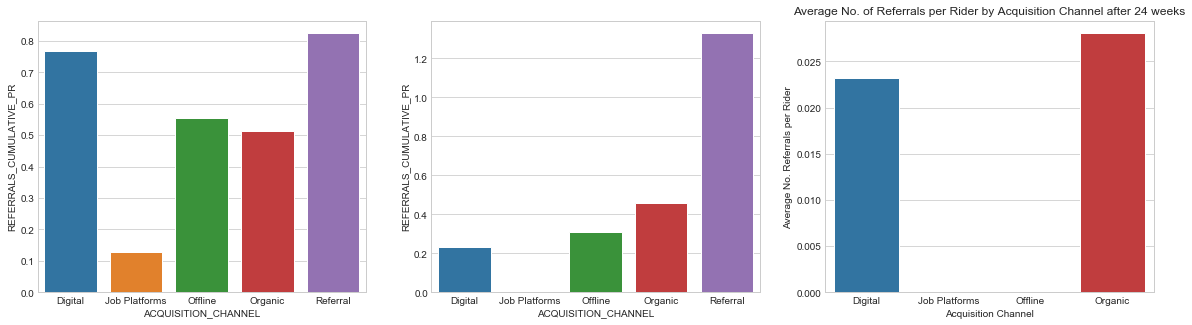

In [46]:
# Set the width, height and subplots of the figure
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

# Plot style
sns.set_style("whitegrid")

# Add title
plt.title("Average No. of Referrals per Rider by Acquisition Channel after 24 weeks")

# Bar chart showing the Average No. of Referrals per Rider by Acquisition Channel after 24 weeks
sns_plot_8_1_4_1 = sns.barplot(x=df_channel_roo_york['ACQUISITION_CHANNEL'], y=df_channel_roo_york['REFERRALS_CUMULATIVE_PR'], ax=ax[0])
sns_plot_8_1_4_2 = sns.barplot(x=df_channel_roo_de_janeiro['ACQUISITION_CHANNEL'], y=df_channel_roo_de_janeiro['REFERRALS_CUMULATIVE_PR'], ax=ax[1])
sns_plot_8_1_4_3 = sns.barplot(x=df_channel_roo_town['ACQUISITION_CHANNEL'], y=df_channel_roo_town['REFERRALS_CUMULATIVE_PR'], ax=ax[2])

# Add labels for axes
plt.xlabel("Acquisition Channel")
plt.ylabel("Average No. Referrals per Rider")

# Save plots
fig_8_1_4_1 = sns_plot_8_1_4_1.get_figure()
fig_8_1_4_1.savefig("./figures/revised/8_1_4_1.png") 

fig_8_1_4_2 = sns_plot_8_1_4_2.get_figure()
fig_8_1_4_2.savefig("./figures/revised/8_1_4_2.png")

fig_8_1_4_3 = sns_plot_8_1_4_3.get_figure()
fig_8_1_4_3.savefig("./figures/revised/8_1_4_3.png") 

# Show figure
fig.show()

##### Plot 5: Average No. of Successful Referrals per Rider by Acquisition Channel

/Users/eddwebster/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


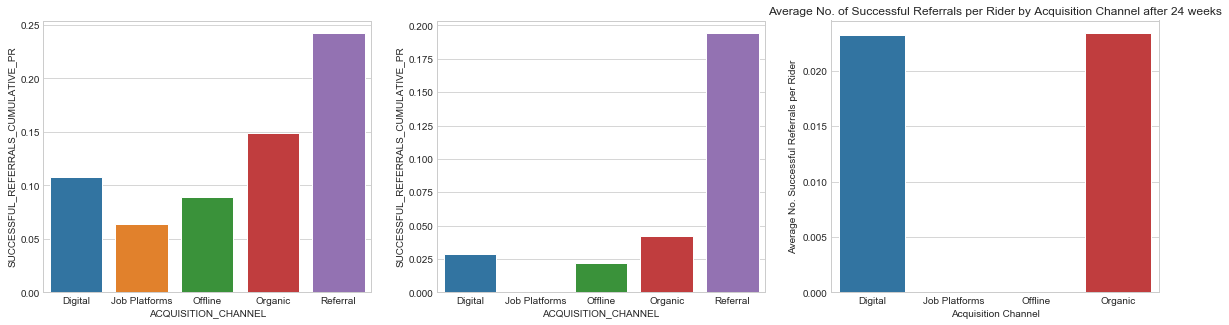

In [47]:
# Set the width, height and subplots of the figure
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

# Plot style
sns.set_style("whitegrid")

# Add title
plt.title("Average No. of Successful Referrals per Rider by Acquisition Channel after 24 weeks")

# Bar chart showing the Average No. of Successful Referrals per Rider by Acquisition Channel after 24 weeks
sns_plot_8_1_5_1 = sns.barplot(x=df_channel_roo_york['ACQUISITION_CHANNEL'], y=df_channel_roo_york['SUCCESSFUL_REFERRALS_CUMULATIVE_PR'], ax=ax[0])
sns_plot_8_1_5_2 = sns.barplot(x=df_channel_roo_de_janeiro['ACQUISITION_CHANNEL'], y=df_channel_roo_de_janeiro['SUCCESSFUL_REFERRALS_CUMULATIVE_PR'], ax=ax[1])
sns_plot_8_1_5_3 = sns.barplot(x=df_channel_roo_town['ACQUISITION_CHANNEL'], y=df_channel_roo_town['SUCCESSFUL_REFERRALS_CUMULATIVE_PR'], ax=ax[2])

# Add labels for axes
plt.xlabel("Acquisition Channel")
plt.ylabel("Average No. Successful Referrals per Rider")

# Save plots
fig_8_1_5_1 = sns_plot_8_1_5_1.get_figure()
fig_8_1_5_1.savefig("./figures/revised/8_1_5_1.png") 

fig_8_1_5_2 = sns_plot_8_1_5_2.get_figure()
fig_8_1_5_2.savefig("./figures/revised/8_1_5_2.png")

fig_8_1_5_3 = sns_plot_8_1_5_3.get_figure()
fig_8_1_5_3.savefig("./figures/revised/8_1_5_3.png") 

# Show figure
fig.show()

#### Analysis
As per Section 5.3, all analysis focuses on the Referral Acquisition Channel, comparing this to the other channels. Each of the five previous plots has a written paragraph, interpreting the results.

##### Plot 1: Average No. of Hours Worked per Rider by Acquisition Channel
...


##### Plot 2: Average No. of Orders Delivered per Rider by Acquisition Channel
...


##### Plot 3: Throughput per Rider by Acquisition Channel
...


##### Plot 4: Average No. of Referrals per Rider by Acquisition Channel
...


##### Plot 5: Average No. of Successful Referrals per Rider by Acquisition Channel
...

Outstanding questions:
*    Was a stratified sample used? I.e. are the totals of riders in each location truely representative of the Deliveroo rider fleet? Can we an equal number of riders in each location/a better representation?
*    Can we get data for other locations? Deliveroo operates in over 200 cities currently. Do we have data for these other cities? How many cities uses an RGR scheme? Geography clearly plays an important role in the analysis of the data, how can we improve the data used?

<a id='section8.2'></a>

### 8.2. Vehicle Type

As per the analysis in [Section 8.1](#section8.1), let's reanswer the questions set out in the brief, but this time by subsetting the data by the Vehicle Types used by the Riders in the dataset, along with their counts.

In [48]:
df['VEHICLE_TYPE'].value_counts()

Bicycle                 3592
Scooter / Motorcycle     909
Motor Vehicle             40
Name: VEHICLE_TYPE, dtype: int64

As we can see, the total number of Riders in our dataset using a Bicycle in our dataset is much greater than 'Scooter / Motorocycle' and 'Motor Vehicle', each making uo 79%, 20%, and 1% respectively. Why is this? Are these proportions an accurate represention of the real world? Did this dataset implement stratified sampling when it was conducted i.e. is this sample and the proportion of Vehicle Types representative of the actual population?

In [49]:
df_bicycle = df.loc[df['VEHICLE_TYPE'] == "Bicycle"]
df_scooter = df.loc[df['VEHICLE_TYPE'] == "Scooter / Motorcycle"]
df_motor = df.loc[df['VEHICLE_TYPE'] == "Motor Vehicle"]

Now that our data is correctly segemented, let's go back and answer the questions previously answers in the first submission in section [5.2](#section5.2) and [5.3](#section5.3) as we did for `LOCATION`.

<a id='section8.2.1'></a>

#### 8.2.1. How has the RGR Scheme's Performance Compare with other Channels?

Again, the dataset will be plotted as per [Section 5.2](#section5.2) of the original report with the number of riders by Acquisition Channel to see the volumes of Riders recruited by each different channel. This time, the three subplots each seperated by `VEHICLE_TYPE`.

#### Plot the Data

/Users/eddwebster/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


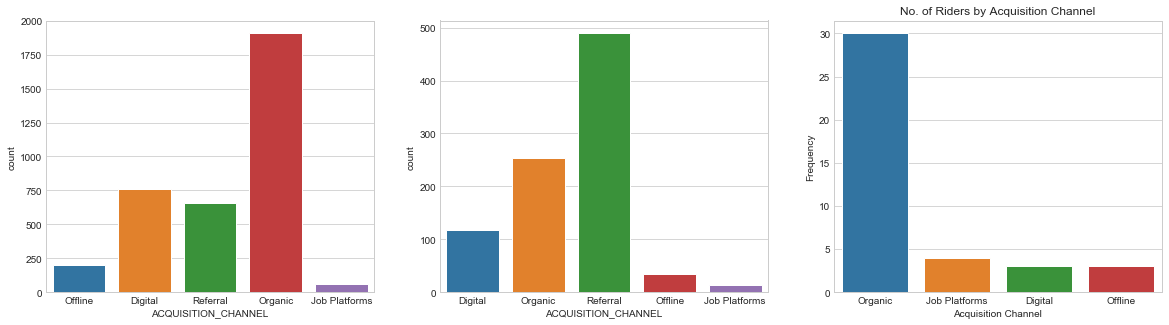

In [50]:
# Set the width, height and subplots of the figure
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

# Plot style
sns.set_style("whitegrid")

# Add title
plt.title("No. of Riders by Acquisition Channel")

# Bar chart showing 
sns_plot_8_2_1 = sns.countplot(df_bicycle['ACQUISITION_CHANNEL'], ax=ax[0])
sns_plot_8_2_2 = sns.countplot(df_scooter['ACQUISITION_CHANNEL'], ax=ax[1])
sns_plot_8_2_3 = sns.countplot(df_motor['ACQUISITION_CHANNEL'], ax=ax[2])

# Add labels for axes
plt.xlabel("Acquisition Channel")
plt.ylabel("Frequency")

# Save plots
fig_8_2_1 = sns_plot_8_2_1.get_figure()
fig_8_2_1.savefig("./figures/revised/8_2_1.png") 

fig_8_2_2 = sns_plot_8_2_2.get_figure()
fig_8_2_2.savefig("./figures/revised/8_2_2.png") 

fig_8_2_3 = sns_plot_8_2_3.get_figure()
fig_8_2_3.savefig("./figures/revised/8_2_3.png") 

# Show figure
fig.show()

In [65]:
print(df_bicycle['ACQUISITION_CHANNEL'].describe())
print(df_scooter['ACQUISITION_CHANNEL'].describe())
print(df_motor['ACQUISITION_CHANNEL'].describe())

count        3592
unique          5
top       Organic
freq         1906
Name: ACQUISITION_CHANNEL, dtype: object
count          909
unique           5
top       Referral
freq           489
Name: ACQUISITION_CHANNEL, dtype: object
count          40
unique          4
top       Organic
freq           30
Name: ACQUISITION_CHANNEL, dtype: object


In [66]:
print(df_bicycle.groupby('ACQUISITION_CHANNEL')[['RIDER_ID']].count())
print(df_scooter.groupby('ACQUISITION_CHANNEL')[['RIDER_ID']].count())
print(df_motor.groupby('ACQUISITION_CHANNEL')[['RIDER_ID']].count())

                     RIDER_ID
ACQUISITION_CHANNEL          
Digital                   761
Job Platforms              60
Offline                   204
Organic                  1906
Referral                  661
                     RIDER_ID
ACQUISITION_CHANNEL          
Digital                   118
Job Platforms              13
Offline                    35
Organic                   254
Referral                  489
                     RIDER_ID
ACQUISITION_CHANNEL          
Digital                     3
Job Platforms               4
Offline                     3
Organic                    30


#### Analysis
We have plotted the data by Acquisition Channel type, with the Riders seperated onto three plots by `VEHICLE_TYPE`. As we can see, much like are analysis for `LOCATION`, the trends regarding acquisition channel, much like the analysis for Location, is not as clear cut as originally thought.

As mentioned in the analysis of `VEHICLE_TYPE`, the overall dataset in [Section 5.2](#section5.2), we saw that a quarter of the riders (25.3%) joined Deliveroo through the RGR scheme, the second most popular Acquisition Channel after Organic, which makes up just under half the dataset (48.2%). However, when we segment this by `LOCATION`, we can see clear variations depending on the Location.

When looking at the three data subsets side-by-side, 'Bicycle', which makes up 79% of the dataset, is observed that Organic referrals is by far the most effective form of recruitment with 1,906 Riders (53%). Digital places second with 761 Riders (21.1%). Referrals places only third 661 (18.4%). We can see that that regarding that the RGR scheme is less good at recruiting bicycle riders.

However, when we look at Scooter and Motor Cycle Riders, which makes up 20% of the total dataset, the data is much more positive for the RGR scheme. In this plot, we can see that the RGR scheme outperforms all other channels, recruiting 489 Riders (53.8%). The next best channel is Organic recruiting 254 Riders (27.9%). We can see that overall, the scheme is doing a great job at recruiting scooter Riders.

Most interesting, we can look at the dataset for Motor Vehicle Riders, which makes up a small subset of the full dataset with 40 Riders (0.722%), we can see that no Riders in this subset came to Deliveroo through the RGR scheme. Much like in our Roo Town example in section in [Section 8.1.1](#section8.1.1) , all the Riders come from 'Digital', 'Offline', 'Organic', and 'Job Platforms', the highest being organic with 40 Riders (75.0%). So the question is, why is this the case? The dataset is very small so maybe, by chance, no Riders which Motor Vehicles happened to be recruited through the RGR scheme in this instance. Maybe the scheme was not targeted at people with Motor Vehicles and instead, more at people with Scooters and Motorcycles or Bicycles.

From this analysis, it is difficult to say if we have found **selection bias** as the dataset is so small, however, maybe this has taken place for the aforementioned factors or for other reasons I have not discussed.


#### Conclusions
After discovering around 0.772% of the total datset is not applicable for the RGR scheme effectiveness, I can now comment that the analysis in [Section 5.2](#section5.2) and [Section 5.3](#section5.3) will be slightly skewed, but not as greatly as it was regarding the findings for Roo Town.

Upon repetition of this report, I would now repeat all my previous analysis but remove all Motor Vehicle Riders from the dataset in an attempt to eliminate selection bias from analysis of the RGR scheme. However, I would be hesistant to do this as the dataset was so small. I would ideally like to see a larger dataset and repeat the experimentation to see if these trends continued.

<a id='section8.2.2'></a>

#### 8.2.2. How does Rider Performance / Behaviour vary between the Channels?

Again, the dataset will be plotted as per [Section 5.3](#section5.3) in the original report, this time seperated by `VEHICLE_TYPE`.

#### Group the data
Before any plotting can be done, just like in section 4.3 where I was required to create new grouped DataFrame, I will need to do the same but this time for each `VEHICLE_TYPE`.

In [51]:
# Created groupedby DataFrame, by channel, for drivers with Bicycles
df_channel_bicycle = df_bicycle.groupby(
   ['ACQUISITION_CHANNEL']
).agg(
    {
         'RIDER_ID': 'count',                        # the total number of Riders
         'HOURS_WORKED_CUMULATIVE': 'sum',           # the sum total of cumulative hours worked
         'ORDERS_DELIVERED_CUMULATIVE': 'sum',       # the sum total of cumulative delivered orders
         'THROUGHPUT_CUMULATIVE': 'sum',             # the sum total of cumulative throughput
         'REFERRALS_CUMULATIVE': 'sum',              # the sum total of cumulative referrals
         'SUCCESSFUL_REFERRALS_CUMULATIVE': 'sum'    # the sum total of cumulative successful referrals
    }
).reset_index()

# Rename the RIDER_ID column to TOTAL_RIDERS
df_channel_bicycle = df_channel_bicycle.rename(columns={'RIDER_ID':'TOTAL_RIDERS'})

# Create per Rider (PR) columns
df_channel_bicycle['HOURS_WORKED_CUMULATIVE_PR'] = df_channel_bicycle['HOURS_WORKED_CUMULATIVE'] / df_channel_bicycle['TOTAL_RIDERS']
df_channel_bicycle['ORDERS_DELIVERED_CUMULATIVE_PR'] = df_channel_bicycle['ORDERS_DELIVERED_CUMULATIVE'] / df_channel_bicycle['TOTAL_RIDERS']
df_channel_bicycle['THROUGHPUT_CUMULATIVE_PR'] = df_channel_bicycle['THROUGHPUT_CUMULATIVE'] / df_channel_bicycle['TOTAL_RIDERS']
df_channel_bicycle['REFERRALS_CUMULATIVE_PR'] = df_channel_bicycle['REFERRALS_CUMULATIVE'] / df_channel_bicycle['TOTAL_RIDERS']
df_channel_bicycle['SUCCESSFUL_REFERRALS_CUMULATIVE_PR'] = df_channel_bicycle['SUCCESSFUL_REFERRALS_CUMULATIVE'] / df_channel_bicycle['TOTAL_RIDERS']

# Drop unnamed channel (created 2nd index)
df_channel_bicycle = df_channel_bicycle.loc[:, ~df_channel_bicycle.columns.str.contains('^Unnamed')]

df_channel_bicycle

,ACQUISITION_CHANNEL,TOTAL_RIDERS,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT_CUMULATIVE,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS_CUMULATIVE,HOURS_WORKED_CUMULATIVE_PR,ORDERS_DELIVERED_CUMULATIVE_PR,THROUGHPUT_CUMULATIVE_PR,REFERRALS_CUMULATIVE_PR,SUCCESSFUL_REFERRALS_CUMULATIVE_PR
0,Digital,761,99710.047526,200608.0,1361.103962,462.0,57.0,131.025030,263.611038,1.788573,0.607096,0.074901
1,Job Platforms,60,8936.060038,18266.0,105.400546,3.0,0.0,148.934334,304.433333,1.756676,0.050000,0.000000
2,Offline,204,22635.225791,45726.0,352.885315,53.0,10.0,110.956989,224.147059,1.729830,0.259804,0.049020
3,Organic,1906,306763.205661,689809.0,3819.049889,763.0,115.0,160.946068,361.914481,2.003699,0.400315,0.060336
4,Referral,661,87467.078963,169715.0,1160.331180,445.0,104.0,132.325384,256.754917,1.755418,0.673222,0.157337


In [52]:
# Created groupedby DataFrame, by channel, for drivers with Scooters
df_channel_scooter = df_scooter.groupby(
   ['ACQUISITION_CHANNEL']
).agg(
    {
         'RIDER_ID': 'count',                        # the total number of Riders
         'HOURS_WORKED_CUMULATIVE': 'sum',           # the sum total of cumulative hours worked
         'ORDERS_DELIVERED_CUMULATIVE': 'sum',       # the sum total of cumulative delivered orders
         'THROUGHPUT_CUMULATIVE': 'sum',             # the sum total of cumulative throughput
         'REFERRALS_CUMULATIVE': 'sum',              # the sum total of cumulative referrals
         'SUCCESSFUL_REFERRALS_CUMULATIVE': 'sum'    # the sum total of cumulative successful referrals
    }
).reset_index()

# Rename the RIDER_ID column to TOTAL_RIDERS
df_channel_scooter = df_channel_scooter.rename(columns={'RIDER_ID':'TOTAL_RIDERS'})

# Create per Rider (PR) columns
df_channel_scooter['HOURS_WORKED_CUMULATIVE_PR'] = df_channel_scooter['HOURS_WORKED_CUMULATIVE'] / df_channel_scooter['TOTAL_RIDERS']
df_channel_scooter['ORDERS_DELIVERED_CUMULATIVE_PR'] = df_channel_scooter['ORDERS_DELIVERED_CUMULATIVE'] / df_channel_scooter['TOTAL_RIDERS']
df_channel_scooter['THROUGHPUT_CUMULATIVE_PR'] = df_channel_scooter['THROUGHPUT_CUMULATIVE'] / df_channel_scooter['TOTAL_RIDERS']
df_channel_scooter['REFERRALS_CUMULATIVE_PR'] = df_channel_scooter['REFERRALS_CUMULATIVE'] / df_channel_scooter['TOTAL_RIDERS']
df_channel_scooter['SUCCESSFUL_REFERRALS_CUMULATIVE_PR'] = df_channel_scooter['SUCCESSFUL_REFERRALS_CUMULATIVE'] / df_channel_scooter['TOTAL_RIDERS']

# Drop unnamed channel (created 2nd index)
df_channel_scooter = df_channel_scooter.loc[:, ~df_channel_scooter.columns.str.contains('^Unnamed')]

df_channel_scooter

,ACQUISITION_CHANNEL,TOTAL_RIDERS,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT_CUMULATIVE,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS_CUMULATIVE,HOURS_WORKED_CUMULATIVE_PR,ORDERS_DELIVERED_CUMULATIVE_PR,THROUGHPUT_CUMULATIVE_PR,REFERRALS_CUMULATIVE_PR,SUCCESSFUL_REFERRALS_CUMULATIVE_PR
0,Digital,118,39003.881919,88713.0,258.487577,71.0,18.0,330.541372,751.805085,2.190573,0.601695,0.152542
1,Job Platforms,13,3964.940558,9372.0,25.395769,3.0,3.0,304.995428,720.923077,1.953521,0.230769,0.230769
2,Offline,35,14476.594158,32079.0,75.506703,60.0,7.0,413.616976,916.542857,2.157334,1.714286,0.200000
3,Organic,254,89999.829912,211787.0,572.520756,199.0,78.0,354.330039,833.807087,2.254019,0.783465,0.307087
4,Referral,489,209932.966303,469395.0,1071.597213,536.0,171.0,429.310770,959.907975,2.191405,1.096115,0.349693


In [53]:
# Created groupedby DataFrame, by channel, for drivers with Motor Vehicles
df_channel_motor = df_motor.groupby(
   ['ACQUISITION_CHANNEL']
).agg(
    {
         'RIDER_ID': 'count',                        # the total number of Riders
         'HOURS_WORKED_CUMULATIVE': 'sum',           # the sum total of cumulative hours worked
         'ORDERS_DELIVERED_CUMULATIVE': 'sum',       # the sum total of cumulative delivered orders
         'THROUGHPUT_CUMULATIVE': 'sum',             # the sum total of cumulative throughput
         'REFERRALS_CUMULATIVE': 'sum',              # the sum total of cumulative referrals
         'SUCCESSFUL_REFERRALS_CUMULATIVE': 'sum'    # the sum total of cumulative successful referrals
    }
).reset_index()

# Rename the RIDER_ID column to TOTAL_RIDERS
df_channel_motor = df_channel_motor.rename(columns={'RIDER_ID':'TOTAL_RIDERS'})

# Create per Rider (PR) columns
df_channel_motor['HOURS_WORKED_CUMULATIVE_PR'] = df_channel_motor['HOURS_WORKED_CUMULATIVE'] / df_channel_motor['TOTAL_RIDERS']
df_channel_motor['ORDERS_DELIVERED_CUMULATIVE_PR'] = df_channel_motor['ORDERS_DELIVERED_CUMULATIVE'] / df_channel_motor['TOTAL_RIDERS']
df_channel_motor['THROUGHPUT_CUMULATIVE_PR'] = df_channel_motor['THROUGHPUT_CUMULATIVE'] / df_channel_motor['TOTAL_RIDERS']
df_channel_motor['REFERRALS_CUMULATIVE_PR'] = df_channel_motor['REFERRALS_CUMULATIVE'] / df_channel_motor['TOTAL_RIDERS']
df_channel_motor['SUCCESSFUL_REFERRALS_CUMULATIVE_PR'] = df_channel_motor['SUCCESSFUL_REFERRALS_CUMULATIVE'] / df_channel_motor['TOTAL_RIDERS']

# Drop unnamed channel (created 2nd index)
df_channel_motor = df_channel_motor.loc[:, ~df_channel_motor.columns.str.contains('^Unnamed')]

df_channel_motor

,ACQUISITION_CHANNEL,TOTAL_RIDERS,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT_CUMULATIVE,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS_CUMULATIVE,HOURS_WORKED_CUMULATIVE_PR,ORDERS_DELIVERED_CUMULATIVE_PR,THROUGHPUT_CUMULATIVE_PR,REFERRALS_CUMULATIVE_PR,SUCCESSFUL_REFERRALS_CUMULATIVE_PR
0,Digital,3,1600.008607,3160.0,5.686152,0.0,0.0,533.336202,1053.333333,1.895384,0.0,0.0
1,Job Platforms,4,2022.873327,4394.0,8.972526,0.0,0.0,505.718332,1098.500000,2.243132,0.0,0.0
2,Offline,3,708.601113,1227.0,5.849870,0.0,0.0,236.200371,409.000000,1.949957,0.0,0.0
3,Organic,30,11123.609727,22917.0,61.864684,0.0,0.0,370.786991,763.900000,2.062156,0.0,0.0


Now I am ready to plot the data.

#### Analysis

##### Plot 1: Average No. of Hours Worked per Rider by Acquisition Channel

/Users/eddwebster/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


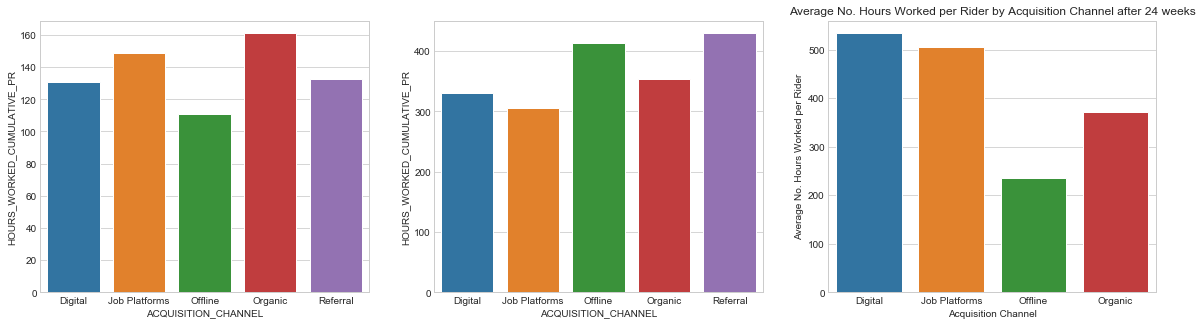

In [54]:
# Set the width, height and subplots of the figure
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

# Plot style
sns.set_style("whitegrid")

# Add title
plt.title("Average No. Hours Worked per Rider by Acquisition Channel after 24 weeks")

# Bar chart showing the Average No. Hours Worked per Rider by Acquisition Channel after 24 weeks
sns_plot_8_2_1_1 = sns.barplot(x=df_channel_bicycle['ACQUISITION_CHANNEL'], y=df_channel_bicycle['HOURS_WORKED_CUMULATIVE_PR'], ax=ax[0])
sns_plot_8_2_1_2 = sns.barplot(x=df_channel_scooter['ACQUISITION_CHANNEL'], y=df_channel_scooter['HOURS_WORKED_CUMULATIVE_PR'], ax=ax[1])
sns_plot_8_2_1_3 = sns.barplot(x=df_channel_motor['ACQUISITION_CHANNEL'], y=df_channel_motor['HOURS_WORKED_CUMULATIVE_PR'], ax=ax[2])

# Add labels for axes
plt.xlabel("Acquisition Channel")
plt.ylabel("Average No. Hours Worked per Rider")

# Save plots
fig_8_2_1_1 = sns_plot_8_2_1_1.get_figure()
fig_8_2_1_1.savefig("./figures/revised/8_2_1_1.png") 

fig_8_2_1_2 = sns_plot_8_2_1_2.get_figure()
fig_8_2_1_2.savefig("./figures/revised/8_2_1_2.png")

fig_8_2_1_3 = sns_plot_8_2_1_3.get_figure()
fig_8_2_1_3.savefig("./figures/revised/8_2_1_3.png") 

# Show figure
fig.show()

##### Plot 2: Average No. of Orders Delivered per Rider by Acquisition Channel

/Users/eddwebster/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


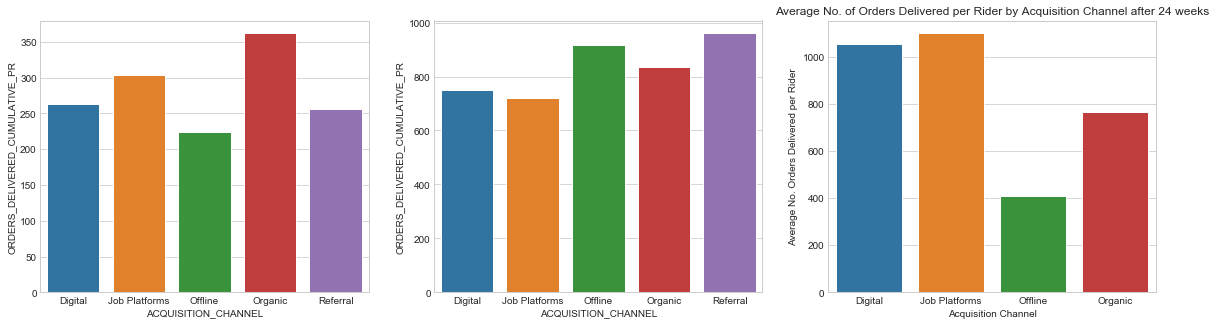

In [55]:
# Set the width, height and subplots of the figure
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

# Plot style
sns.set_style("whitegrid")

# Add title
plt.title("Average No. of Orders Delivered per Rider by Acquisition Channel after 24 weeks")

# Bar chart showing the Average No. of Orders Delivered per Rider by Acquisition Channel after 24 weeks
sns_plot_8_2_2_1 = sns.barplot(x=df_channel_bicycle['ACQUISITION_CHANNEL'], y=df_channel_bicycle['ORDERS_DELIVERED_CUMULATIVE_PR'], ax=ax[0])
sns_plot_8_2_2_2 = sns.barplot(x=df_channel_scooter['ACQUISITION_CHANNEL'], y=df_channel_scooter['ORDERS_DELIVERED_CUMULATIVE_PR'], ax=ax[1])
sns_plot_8_2_2_3 = sns.barplot(x=df_channel_motor['ACQUISITION_CHANNEL'], y=df_channel_motor['ORDERS_DELIVERED_CUMULATIVE_PR'], ax=ax[2])

# Add labels for axes
plt.xlabel("Acquisition Channel")
plt.ylabel("Average No. Orders Delivered per Rider")

# Save plots
fig_8_2_2_1 = sns_plot_8_2_2_1.get_figure()
fig_8_2_2_1.savefig("./figures/revised/8_2_2_1.png") 

fig_8_2_2_2 = sns_plot_8_2_2_2.get_figure()
fig_8_2_2_2.savefig("./figures/revised/8_2_2_2.png")

fig_8_2_2_3 = sns_plot_8_2_2_3.get_figure()
fig_8_2_2_3.savefig("./figures/revised/8_2_2_3.png") 

# Show figure
fig.show()

##### Plot 3: Throughput per Rider by Acquisition Channel

/Users/eddwebster/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


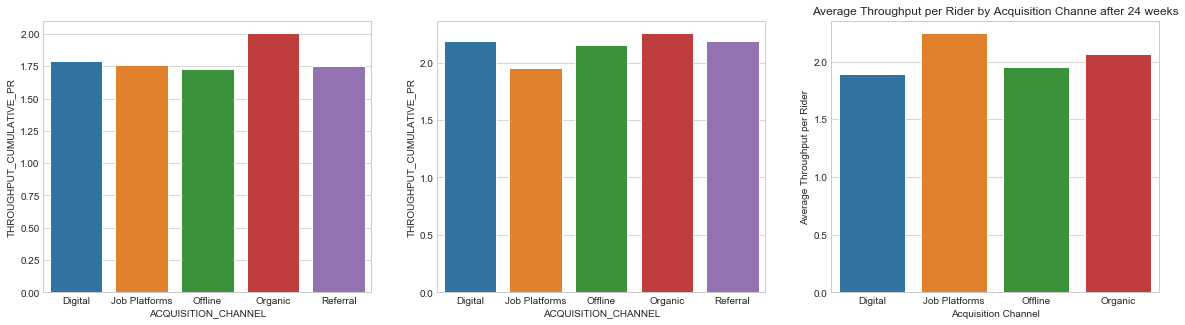

In [56]:
# Set the width, height and subplots of the figure
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

# Plot style
sns.set_style("whitegrid")

# Add title
plt.title("Average Throughput per Rider by Acquisition Channe after 24 weeks")

# Bar chart showing the Average Throughput per Rider by Acquisition Channel after 24 weeks
sns_plot_8_2_3_1 = sns.barplot(x=df_channel_bicycle['ACQUISITION_CHANNEL'], y=df_channel_bicycle['THROUGHPUT_CUMULATIVE_PR'], ax=ax[0])
sns_plot_8_2_3_2 = sns.barplot(x=df_channel_scooter['ACQUISITION_CHANNEL'], y=df_channel_scooter['THROUGHPUT_CUMULATIVE_PR'], ax=ax[1])
sns_plot_8_2_3_3 = sns.barplot(x=df_channel_motor['ACQUISITION_CHANNEL'], y=df_channel_motor['THROUGHPUT_CUMULATIVE_PR'], ax=ax[2])
# Add labels for axes
plt.xlabel("Acquisition Channel")
plt.ylabel("Average Throughput per Rider")

# Save plots
fig_8_2_3_1 = sns_plot_8_2_3_1.get_figure()
fig_8_2_3_1.savefig("./figures/revised/8_2_3_1.png") 

fig_8_2_3_2 = sns_plot_8_2_3_2.get_figure()
fig_8_2_3_2.savefig("./figures/revised/8_2_3_2.png")

fig_8_2_3_3 = sns_plot_8_2_3_3.get_figure()
fig_8_2_3_3.savefig("./figures/revised/8_2_3_3.png") 

# Show figure
fig.show()

##### Plot 4: Average No. of Referrals per Rider by Acquisition Channel

/Users/eddwebster/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


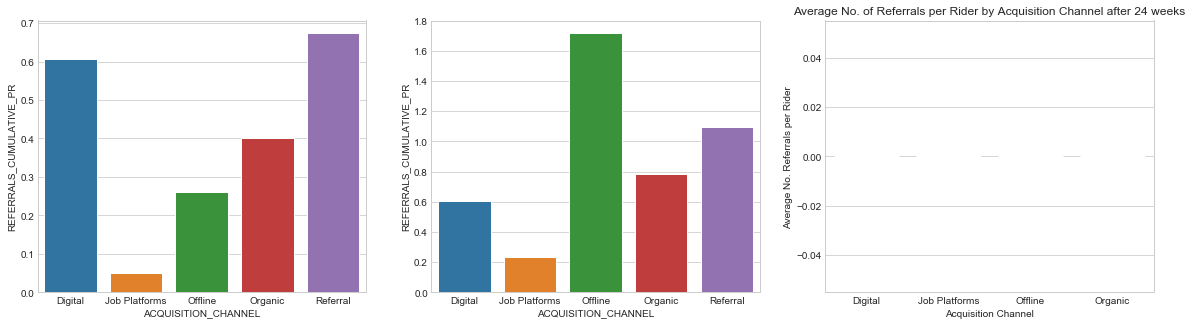

In [57]:
# Set the width, height and subplots of the figure
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

# Plot style
sns.set_style("whitegrid")

# Add title
plt.title("Average No. of Referrals per Rider by Acquisition Channel after 24 weeks")

# Bar chart showing the Average No. of Referrals per Rider by Acquisition Channel after 24 weeks
sns_plot_8_2_4_1 = sns.barplot(x=df_channel_bicycle['ACQUISITION_CHANNEL'], y=df_channel_bicycle['REFERRALS_CUMULATIVE_PR'], ax=ax[0])
sns_plot_8_2_4_2 = sns.barplot(x=df_channel_scooter['ACQUISITION_CHANNEL'], y=df_channel_scooter['REFERRALS_CUMULATIVE_PR'], ax=ax[1])
sns_plot_8_2_4_3 = sns.barplot(x=df_channel_motor['ACQUISITION_CHANNEL'], y=df_channel_motor['REFERRALS_CUMULATIVE_PR'], ax=ax[2])

# Add labels for axes
plt.xlabel("Acquisition Channel")
plt.ylabel("Average No. Referrals per Rider")

# Save plots
fig_8_2_4_1 = sns_plot_8_2_4_1.get_figure()
fig_8_2_4_1.savefig("./figures/revised/8_2_4_1.png") 

fig_8_2_4_2 = sns_plot_8_2_4_2.get_figure()
fig_8_2_4_2.savefig("./figures/revised/8_2_4_2.png")

fig_8_2_4_3 = sns_plot_8_2_4_3.get_figure()
fig_8_2_4_3.savefig("./figures/revised/8_2_4_3.png") 

# Show figure
fig.show()

##### Plot 5: Average No. of Successful Referrals per Rider by Acquisition Channel

/Users/eddwebster/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


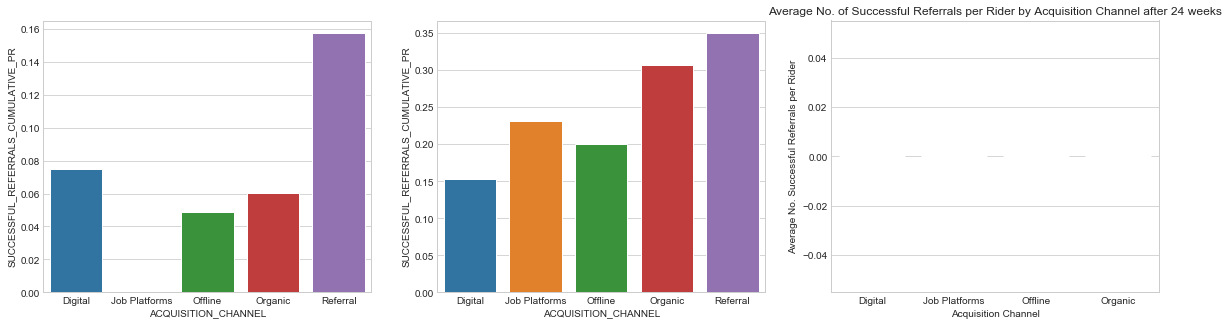

In [58]:
# Set the width, height and subplots of the figure
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

# Plot style
sns.set_style("whitegrid")

# Add title
plt.title("Average No. of Successful Referrals per Rider by Acquisition Channel after 24 weeks")

# Bar chart showing the Average No. of Successful Referrals per Rider by Acquisition Channel after 24 weeks
sns_plot_8_2_5_1 = sns.barplot(x=df_channel_bicycle['ACQUISITION_CHANNEL'], y=df_channel_bicycle['SUCCESSFUL_REFERRALS_CUMULATIVE_PR'], ax=ax[0])
sns_plot_8_2_5_2 = sns.barplot(x=df_channel_scooter['ACQUISITION_CHANNEL'], y=df_channel_scooter['SUCCESSFUL_REFERRALS_CUMULATIVE_PR'], ax=ax[1])
sns_plot_8_2_5_3 = sns.barplot(x=df_channel_motor['ACQUISITION_CHANNEL'], y=df_channel_motor['SUCCESSFUL_REFERRALS_CUMULATIVE_PR'], ax=ax[2])

# Add labels for axes
plt.xlabel("Acquisition Channel")
plt.ylabel("Average No. Successful Referrals per Rider")

# Save plots
fig_8_2_5_1 = sns_plot_8_2_5_1.get_figure()
fig_8_2_5_1.savefig("./figures/revised/8_2_5_1.png") 

fig_8_2_5_2 = sns_plot_8_2_5_2.get_figure()
fig_8_2_5_2.savefig("./figures/revised/8_2_5_2.png")

fig_8_2_5_3 = sns_plot_8_2_5_3.get_figure()
fig_8_2_5_3.savefig("./figures/revised/8_2_5_3.png") 

# Show figure
fig.show()

#### Analysis
As per [Section 5.3](#section5.2), all analysis focuses on the Referral Acquisition Channel, comparing this to the other channels. Each of the five previous plots has a written paragraph, interpreting the results.

##### Plot 1: Average No. of Hours Worked per Rider by Acquisition Channel
...


##### Plot 2: Average No. of Orders Delivered per Rider by Acquisition Channel
...


##### Plot 3: Throughput per Rider by Acquisition Channel
...


##### Plot 4: Average No. of Referrals per Rider by Acquisition Channel
...


##### Plot 5: Average No. of Successful Referrals per Rider by Acquisition Channel
...



#### Conclusions
...

<a id='section8.3'></a>

### 8.3. Next Steps...Revisited
As demonstrated in Sections [8.1](#section8.1) and [8.2](#section5.2), segementation of this Rider dataset by different features such as `LOCATION` and `VEHICLE_TYPE` shows the performance of the RGR scheme at a deeper level, providing insights to those originally presentated in the first submission of this report.

In this final subsection of this revision chapter, I would like to propose greater scruitiny of the data itself.

<a id='section8.3.1'></a>

#### 8.3.1 Missing Data / Metrics to Consider
This dataset contains nineteen features in total, which is quite small relative to a real-world dataset. My first query would be to ask about the features that we not include. Is this dataset just a slimmed down version, are their features in the dataset I didn't have the opportunity to analyse that would have a great impact on the research findings? As we've seen in Sections , subsetting the dataset by certain features can have a great impact on the analysis. Maybe there are other unknown features that we're currently unaware of but would be of great statistical use.

Examples of some other metrics and factors that I would consider important to a general dataset of riders. Some of these are not so applicable to this particular task of analysis, but I have included them for reference:
*    Delivery area of a city / Geography. We have differnt location names, but we don't know the type of location. Are these location similarly matched or is their a great variance in their type? E.g. big cities/surburban area, countries with tall buildings like in Hong Kong where Riders need to get up and down stairs, countries like the UAE where restaurants in Mall-type areas and need to be planned for.
*    Weather - when it rains/snows, less riders sign on to be on the road. A double effect is more customers are less likely to want to go outside and will order food in. 'Double-wammy' effect.
*    Special events e.g. football matches such as England World Cup games, important qualfiers etc.
*    Day of the week/time of day. Food consumption is seasonal i.e. peaks at lunch and dinner time during the day, peaks on Sundays during the week as people are at home and preparing for the upcoming work week.

<a id='section8.3.2'></a>

#### 8.3.2 Correlation between this new Data / Features - Correlation Matrix

If new data was to be received with additional features, the importance of recognising which of the features is of greatest statistical relevance the analysis in hand becomes of greater importance. One such technique to determine the most useful features is through a [correlation matrix](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html), .corr(), computing pairwise correlation of features. This can be used for Propensity Matching/Scoring.

An example of this with the current dataset, measuring the correlation of the different columns against SUCCESSFUL_REFERRALS_CUMULATIVEthe is as follows.

In [63]:
df_selected = df[['LOCATION', 'APPLICATION_DATE', 'APPLICATION_APPROVED_DATE',
       'FIRST_WORK_DATE', 'ACQUISITION_CHANNEL', 'VEHICLE_TYPE',
       'WEEKS_SINCE_FIRST_WORK', 'RIDER_ACTIVE', 'HOURS_WORKED',
       'HOURS_WORKED_CUMULATIVE', 'ORDERS_DELIVERED',
       'ORDERS_DELIVERED_CUMULATIVE', 'THROUGHPUT', 'THROUGHPUT_CUMULATIVE', 'SUCCESSFUL_REFERRALS_CUMULATIVE']]

In [64]:
df_selected.corr()['SUCCESSFUL_REFERRALS_CUMULATIVE']

WEEKS_SINCE_FIRST_WORK                  NaN
RIDER_ACTIVE                       0.124046
HOURS_WORKED                       0.009684
HOURS_WORKED_CUMULATIVE            0.108370
ORDERS_DELIVERED                   0.020418
ORDERS_DELIVERED_CUMULATIVE        0.115047
THROUGHPUT                         0.053731
THROUGHPUT_CUMULATIVE              0.042884
SUCCESSFUL_REFERRALS_CUMULATIVE    1.000000
Name: SUCCESSFUL_REFERRALS_CUMULATIVE, dtype: float64

As we can see, none the score aren't that high in this example, but this demonstrates how this would be done.

Another way to look at the importance of certain features compared to others is through Principal Component Analysis (PCA).

<a id='section8.3.3'></a>

#### 8.3.3. Final Thoughts on this Report

Other avenues for analysis
*    I would repeat the analysis, this time removing any locations such as Roo Town where there are no RGR Riders to remove selection bias.
*    I would like to go back and readdress the question in [Section 5.1](#section5.1), 'How do you define a successful scheme?' This I believe is the section most open to debate and the area in the real-world, with a real data set, is the hardest to judge.
*    Regarding expanding the analysis ofthe current data set, one idea to potentially bucket riders by `APPLICATION_DATE`, `APPLICATION_APPROVED_DATE`, `FIRST_WORK_DATE` and conduct analysis again. Maybe at certain times of year Riders with certain application times/first work times perform differently i.e. maybe September is a month of greater intake for students as this is the beginning of the academy/university year and they may behave in a certain way.
*    In this analysis I've only looked at the final cumulation metrics of the Riders. It would be interesting and look at the performance of the Riders over time as a timeline. Does their performance of certain metrics change during the 24 week cycle?
*    Can the data set be increased to more than 24 weeks? What is the average length of time a Rider works for Deliveroo. Is 24 weeks a sufficient enoguh period.
*    This dataset is from 3 countries, from which we know nothing about other than name. Deliveroo works in > 200 citires. Do we have data for the other 200+ cities to gain a better understanding and create a 'truer' data set? How many cities uses an RGR scheme? Geography clearly plays an important role in the analysis of the data, how can we improve the data used?
*    Was a stratified sample used? I.e. are the totals of riders in each location truely representative of the Deliveroo rider fleet? Location and City type were just example of features that need to be controlled when sampling a data set. Can we improve on the dataset we already have>?

<a id='section9'></a>

## 9. References

<a id='section8.1'></a>

### 9.1. Bibliography
1.    [https://www.businessinsider.com/uber-lyft-drivers-livable-wage-complaints-2019-5?r=US&IR=T](https://www.businessinsider.com/uber-lyft-drivers-livable-wage-complaints-2019-5?r=US&IR=T)
2.    [https://www.td.org/insights/has-the-gig-economy-jumped-the-shark](https://www.td.org/insights/has-the-gig-economy-jumped-the-shark)
3.    [https://roocommunity.com/tech-round-up-statistics/](https://roocommunity.com/tech-round-up-statistics/)
4.    [Data Science Festival 2018 - Michael Todd Deliveroo](https://www.youtube.com/watch?v=7iZ-oR3jLXM&list=PL38nJNjpNpH8XQPsvmZOik0jSE4I9wIUi)
5.    [DSF Meetup with Deliveroo 2018 - Jared Conway](https://www.youtube.com/watch?v=DSNlrA2aSiQ&list=PL38nJNjpNpH8XQPsvmZOik0jSE4I9wIUi)
6.    [DSF Day 3 Deliveroo - Jonathan Magnusson & Jamie Edgecombe](https://www.youtube.com/watch?v=Bp88IEc0WpI&list=PL38nJNjpNpH8XQPsvmZOik0jSE4I9wIUi)
7.    [DSF Meetup with Deliveroo 2018 - Ben Sowden and Wing Lon](https://www.youtube.com/watch?v=zzLmjItqQHQ&list=PL38nJNjpNpH8XQPsvmZOik0jSE4I9wIUi)

<a id='section8.2'></a>

### 9.2. Python Techniques Observed
*    pandas EDA methods:
     +    [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html),
     +    [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html),
     +    [shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html),
     +    [columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html),
     +    [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html),
     +    [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html), and
     +    [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html).
*    The [missingno](https://pypi.org/project/missingno/) library to visualise how many missing values we have in the dataset,
*    The pandas [.to_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) method to export the DataFrames as csv files, and
*    The pandas [.groupby()](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) and [.agg()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html) methods to group the data.
*    The pandas [.corr()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) method to compute pairwise correlation of columns.

***Visit my website [EddWebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more Data Science projects.***

[Back to the top](#top)